# 💳 Customer Lifetime Value (LTV) & Fraud Detection Analysis

**Author:** [MeheheP](https://github.com/MeheheP)  
**Project Type:** Data Analytics | Customer Segmentation | Fraud Detection

---

## 📋 Project Overview

This comprehensive data analytics project analyzes credit card transaction data to extract actionable business insights. The analysis covers Customer Lifetime Value (LTV) calculation, transaction pattern analysis, customer segmentation, payment method trends, and fraud detection indicators.

### Key Analyses Performed:

1. **💰 Customer Lifetime Value (LTV) Analysis**
   - Calculate total spend per customer
   - Identify top-value customers
   - Analyze spending patterns and trends

2. **📊 Customer Segmentation**
   - Transaction frequency analysis
   - Spending behavior clustering
   - Customer value tiers

3. **🔍 Fraud Detection Indicators**
   - Transaction anomaly detection
   - Pattern analysis for suspicious activity
   - Risk assessment metrics

4. **📈 Transaction Forecasting**
   - Monthly transaction volume trends
   - Revenue forecasting
   - Seasonal pattern identification

5. **💳 Payment Method Analysis**
   - Chip vs. Swipe vs. Online transactions
   - Payment method preferences
   - Security implications

6. **🏪 Merchant Category Analysis**
   - Top merchant categories by volume
   - Category-wise spending patterns
   - MCC code analysis

---

## 📂 Dataset Information

### Data Sources:
This project uses a synthetic credit card transaction dataset containing:

- **transactions_data.csv** - Transaction records (13M+ transactions)
- **cards_data.csv** - Credit card information
- **users_data.csv** - Customer demographic data
- **mcc_codes.json** - Merchant Category Codes
- **train_fraud_labels.json** - Fraud labels for training

### Dataset Details:
- **Time Period:** 2010-2019
- **Total Transactions:** 13,305,915
- **Total Revenue:** $571,835,522.28
- **Unique Customers:** 1,219
- **Merchant Categories:** 109

**Note:** The dataset used in this analysis is synthetic/sample data. For your own analysis, place your data files in a designated folder and update the `data_path` variable in the first code cell.

---

## 🚀 Getting Started

### Prerequisites

Make sure you have Python 3.7+ installed along with the following libraries:

```bash
pip install pandas numpy matplotlib seaborn scikit-learn jupyter
```

### Installation & Setup

1. **Clone this repository:**
   ```bash
   git clone https://github.com/MeheheP/LTV-Analysis.git
   cd LTV-Analysis
   ```

2. **Install required packages:**
   ```bash
   pip install -r requirements.txt
   ```

3. **Prepare your data:**
   - Place your data files in a folder (e.g., `data/`)
   - Update the `data_path` variable in the first code cell

4. **Run the notebook:**
   ```bash
   jupyter notebook LTV.ipynb
   ```

### Required Python Packages:

```
pandas>=1.3.0
numpy>=1.21.0
matplotlib>=3.4.0
seaborn>=0.11.0
scikit-learn>=0.24.0
jupyter>=1.0.0
```

---

## 📊 Key Findings

### Transaction Overview:
- Average Transaction: **$42.98**
- Median Transaction: **$28.99**
- Monthly Avg Volume: **$4,846,063.75**
- Monthly Avg Count: **112,762 transactions**

### Payment Methods:
- Swipe Transactions: **52.4%**
- Chip Transactions: **35.9%**
- Online Transactions: **11.7%**

### Top Customer Insights:
- Highest LTV Customer: **$2,445,773.25**
- Average Top 10 LTV: **$1,865,671.85**
- LTV Range: **$26,605.34 - $2,445,773.25**

---

## 🛠️ Technologies Used

- **Python** - Primary programming language
- **Pandas** - Data manipulation and analysis
- **NumPy** - Numerical computing
- **Matplotlib & Seaborn** - Data visualization
- **Scikit-learn** - Machine learning utilities
- **Jupyter Notebook** - Interactive development environment

---

## 📁 Repository Structure

```
LTV-Analysis/
│
├── LTV.ipynb                 # Main analysis notebook
├── requirements.txt          # Python dependencies
├── README.md                 # Project documentation
├── .gitignore               # Git ignore file (protects data files)
│
└── data/                    # Data folder (not tracked by git)
    ├── transactions_data.csv
    ├── cards_data.csv
    ├── users_data.csv
    ├── mcc_codes.json
    └── train_fraud_labels.json
```

---

## 🎯 Business Recommendations

Based on the analysis, key recommendations include:

1. **Focus on top 10 LTV customers** for retention programs
2. **Monitor swipe transactions** (52.4% of volume) for optimization
3. **Investigate negative transactions** for potential refund patterns
4. **Develop targeted campaigns** for high-volume merchant categories
5. **Implement time-based promotions** during peak transaction periods

---

## 📄 License

This project is open source and available under the MIT License.

---

## 👤 Author

**MeheheP**  
GitHub: [@MeheheP](https://github.com/MeheheP)

---

## 🤝 Contributing

Contributions, issues, and feature requests are welcome! Feel free to check the issues page.

---

**⭐ If you find this project useful, please consider giving it a star on GitHub!**

In [1]:
import pandas as pd
import json
import os

# Set the path to the folder where you extracted the dataset
data_path = r"C:\Users\hp\OneDrive\Desktop\DesktopFolders\data"  # 
# Load CSV files
transactions_df = pd.read_csv(os.path.join(data_path, "transactions_data.csv"))
cards_df = pd.read_csv(os.path.join(data_path, "cards_data.csv"))
users_df = pd.read_csv(os.path.join(data_path, "users_data.csv"))

# Load JSON files 
with open(os.path.join(data_path, "mcc_codes.json"), "r") as f:
    mcc_codes = json.load(f)

with open(os.path.join(data_path, "train_fraud_labels.json"), "r") as f:
    fraud_labels = json.load(f)

# Preview the data
print("Transactions:\n", transactions_df.head())
print("\nCards:\n", cards_df.head())
print("\nUsers:\n", users_df.head())


Transactions:
         id                 date  client_id  card_id   amount  \
0  7475327  2010-01-01 00:01:00       1556     2972  $-77.00   
1  7475328  2010-01-01 00:02:00        561     4575   $14.57   
2  7475329  2010-01-01 00:02:00       1129      102   $80.00   
3  7475331  2010-01-01 00:05:00        430     2860  $200.00   
4  7475332  2010-01-01 00:06:00        848     3915   $46.41   

            use_chip  merchant_id merchant_city merchant_state      zip   mcc  \
0  Swipe Transaction        59935        Beulah             ND  58523.0  5499   
1  Swipe Transaction        67570    Bettendorf             IA  52722.0  5311   
2  Swipe Transaction        27092         Vista             CA  92084.0  4829   
3  Swipe Transaction        27092   Crown Point             IN  46307.0  4829   
4  Swipe Transaction        13051       Harwood             MD  20776.0  5813   

  errors  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  

Cards:
      id  client_id  card_brand        

In [2]:
import pandas as pd
import json
import os

# Set the path to the folder where you extracted the dataset
data_path = r"C:\Users\hp\OneDrive\Desktop\DesktopFolders\data"
print("Libraries imported and data path set successfully!")

Libraries imported and data path set successfully!


In [3]:
# Load transactions data
transactions_df = pd.read_csv(os.path.join(data_path, "transactions_data.csv"))

print("Transactions Data Loaded!")
print(f"Shape: {transactions_df.shape}")
print(f"\nColumn names: {list(transactions_df.columns)}")
print("\nFirst 5 rows:")
transactions_df.head()

Transactions Data Loaded!
Shape: (13305915, 12)

Column names: ['id', 'date', 'client_id', 'card_id', 'amount', 'use_chip', 'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc', 'errors']

First 5 rows:


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [4]:
# Load cards data
cards_df = pd.read_csv(os.path.join(data_path, "cards_data.csv"))

print("Cards Data Loaded!")
print(f"Shape: {cards_df.shape}")
print(f"\nColumn names: {list(cards_df.columns)}")
print("\nFirst 5 rows:")
cards_df.head()

Cards Data Loaded!
Shape: (6146, 13)

Column names: ['id', 'client_id', 'card_brand', 'card_type', 'card_number', 'expires', 'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date', 'year_pin_last_changed', 'card_on_dark_web']

First 5 rows:


,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [5]:
# Load users data
users_df = pd.read_csv(os.path.join(data_path, "users_data.csv"))

print("Users Data Loaded!")
print(f"Shape: {users_df.shape}")
print(f"\nColumn names: {list(users_df.columns)}")
print("\nFirst 5 rows:")
users_df.head()

Users Data Loaded!
Shape: (2000, 14)

Column names: ['id', 'current_age', 'retirement_age', 'birth_year', 'birth_month', 'gender', 'address', 'latitude', 'longitude', 'per_capita_income', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards']

First 5 rows:


,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [6]:
# Load MCC codes (JSON)
with open(os.path.join(data_path, "mcc_codes.json"), "r") as f:
    mcc_codes = json.load(f)

print("MCC Codes Data Loaded!")
print(f"Type: {type(mcc_codes)}")
print(f"Number of MCC codes: {len(mcc_codes)}")
print("\nFirst 5 MCC code entries:")
for i, (key, value) in enumerate(list(mcc_codes.items())[:5]):
    print(f"{key}: {value}")

MCC Codes Data Loaded!
Type: <class 'dict'>
Number of MCC codes: 109

First 5 MCC code entries:
5812: Eating Places and Restaurants
5541: Service Stations
7996: Amusement Parks, Carnivals, Circuses
5411: Grocery Stores, Supermarkets
4784: Tolls and Bridge Fees


In [7]:
# Load fraud labels (JSON)
with open(os.path.join(data_path, "train_fraud_labels.json"), "r") as f:
    fraud_labels = json.load(f)

print("Fraud Labels Data Loaded!")
print(f"Type: {type(fraud_labels)}")
print(f"Number of fraud label entries: {len(fraud_labels)}")
print("\nFirst 5 fraud label entries:")
for i, (key, value) in enumerate(list(fraud_labels.items())[:5]):
    print(f"Transaction ID {key}: Fraud={value}")

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [8]:
# Summary of all loaded datasets
print("="*80)
print("DATASET SUMMARY")
print("="*80)

print("\n1. TRANSACTIONS DATA (transactions_data.csv)")
print(f"   - Shape: {transactions_df.shape}")
print(f"   - Columns: {', '.join(transactions_df.columns)}")
print(f"   - Description: Transaction records from 2010s with amounts, timestamps, merchant details")

print("\n2. CARDS DATA (cards_data.csv)")
print(f"   - Shape: {cards_df.shape}")
print(f"   - Columns: {', '.join(cards_df.columns)}")
print(f"   - Description: Card information including credit/debit types, limits, activation dates")

print("\n3. USERS DATA (users_data.csv)")
print(f"   - Shape: {users_df.shape}")
print(f"   - Columns: {', '.join(users_df.columns)}")
print(f"   - Description: Customer demographics, income, debt, credit scores")

print("\n4. MCC CODES (mcc_codes.json)")
print(f"   - Type: {type(mcc_codes).__name__}")
print(f"   - Number of entries: {len(mcc_codes)}")
print(f"   - Description: Merchant Category Codes for business type classification")

print("\n5. FRAUD LABELS (train_fraud_labels.json)")
print(f"   - Type: {type(fraud_labels).__name__}")
print(f"   - Number of entries: {len(fraud_labels)}")
print(f"   - Description: Fraud labels for supervised machine learning models")

print("\n" + "="*80)
print("All datasets loaded successfully!")
print("="*80)

DATASET SUMMARY

1. TRANSACTIONS DATA (transactions_data.csv)
   - Shape: (13305915, 12)
   - Columns: id, date, client_id, card_id, amount, use_chip, merchant_id, merchant_city, merchant_state, zip, mcc, errors
   - Description: Transaction records from 2010s with amounts, timestamps, merchant details

2. CARDS DATA (cards_data.csv)
   - Shape: (6146, 13)
   - Columns: id, client_id, card_brand, card_type, card_number, expires, cvv, has_chip, num_cards_issued, credit_limit, acct_open_date, year_pin_last_changed, card_on_dark_web
   - Description: Card information including credit/debit types, limits, activation dates

3. USERS DATA (users_data.csv)
   - Shape: (2000, 14)
   - Columns: id, current_age, retirement_age, birth_year, birth_month, gender, address, latitude, longitude, per_capita_income, yearly_income, total_debt, credit_score, num_credit_cards
   - Description: Customer demographics, income, debt, credit scores

4. MCC CODES (mcc_codes.json)
   - Type: dict
   - Number of e

In [9]:
# EDA: Summary Statistics and Missing Values for Transactions Data
print("=" * 80)
print("TRANSACTIONS DATA - SUMMARY STATISTICS")
print("=" * 80)
print("\nDataFrame Info:")
print(transactions_df.info())
print("\nSummary Statistics:")
print(transactions_df.describe())
print("\nMissing Values:")
print(transactions_df.isnull().sum())
print("\nMissing Values (%):")
print((transactions_df.isnull().sum() / len(transactions_df) * 100).round(2))

TRANSACTIONS DATA - SUMMARY STATISTICS

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB
None

Summary Statistics:
                 id     client_id       card_id   merchant_id           zip  \
count  1.330592e+07  1.330592e+07  1.330592e+07  1.330592e+07  1.165321e+07   
mean   1.558402e+07  1.026812e+03  3.475268e+03  4.772376e+04  5.132782e+04   
std    4.704499e+06  5.816386e+02  1.674356e+03  2.581534e+04  2.940423e+04   
min    7.475327e+06

In [10]:
# EDA: Summary Statistics and Missing Values for Cards Data
print("=" * 80)
print("CARDS DATA - SUMMARY STATISTICS")
print("=" * 80)
print("\nDataFrame Info:")
print(cards_df.info())
print("\nSummary Statistics:")
print(cards_df.describe())
print("\nMissing Values:")
print(cards_df.isnull().sum())
print("\nMissing Values (%):")
print((cards_df.isnull().sum() / len(cards_df) * 100).round(2))

CARDS DATA - SUMMARY STATISTICS

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB
None

Summary Statistics:
 

In [11]:
# EDA: Summary Statistics and Missing Values for Users Data
print("=" * 80)
print("USERS DATA - SUMMARY STATISTICS")
print("=" * 80)
print("\nDataFrame Info:")
print(users_df.info())
print("\nSummary Statistics:")
print(users_df.describe())
print("\nMissing Values:")
print(users_df.isnull().sum())
print("\nMissing Values (%):")
print((users_df.isnull().sum() / len(users_df) * 100).round(2))

USERS DATA - SUMMARY STATISTICS

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB
None

Summar

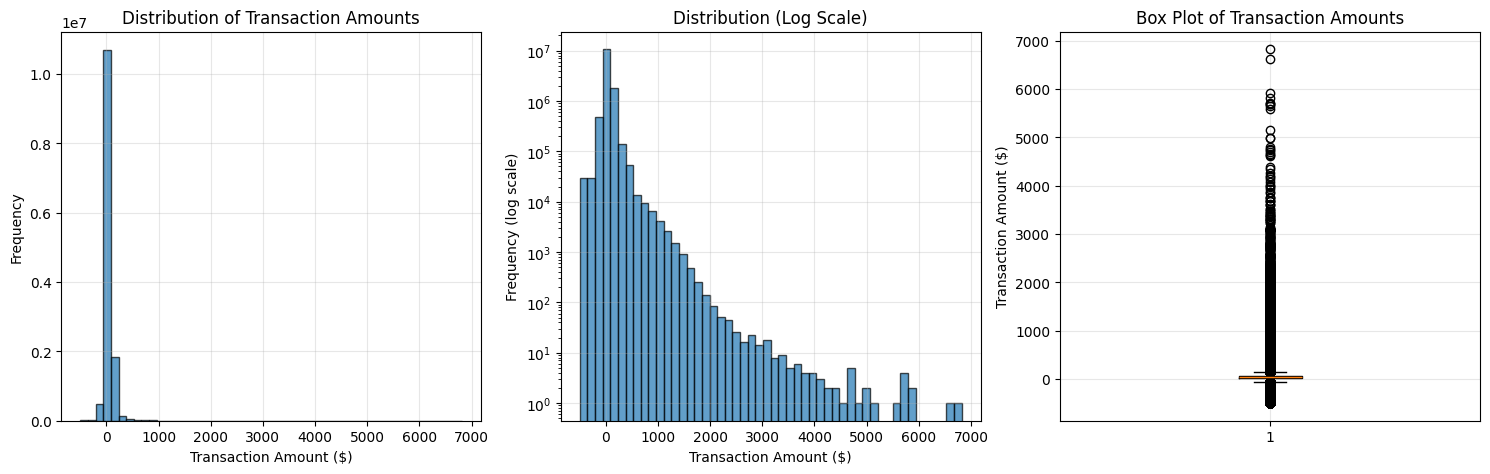


Transaction Amount Statistics:
count    1.330592e+07
mean     4.297604e+01
std      8.165575e+01
min     -5.000000e+02
25%      8.930000e+00
50%      2.899000e+01
75%      6.371000e+01
max      6.820200e+03
Name: amount_numeric, dtype: float64


In [12]:
# EDA: Distribution of Transaction Amounts
import matplotlib.pyplot as plt
import numpy as np

# Convert amount to numeric (removing $ sign if present)
transactions_df['amount_numeric'] = pd.to_numeric(transactions_df['amount'].str.replace('$', ''), errors='coerce')

plt.figure(figsize=(15, 5))

# Plot 1: Histogram of transaction amounts
plt.subplot(1, 3, 1)
plt.hist(transactions_df['amount_numeric'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.grid(True, alpha=0.3)

# Plot 2: Log scale histogram for better visibility
plt.subplot(1, 3, 2)
plt.hist(transactions_df['amount_numeric'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution (Log Scale)')
plt.yscale('log')
plt.grid(True, alpha=0.3)

# Plot 3: Box plot
plt.subplot(1, 3, 3)
plt.boxplot(transactions_df['amount_numeric'].dropna())
plt.ylabel('Transaction Amount ($)')
plt.title('Box Plot of Transaction Amounts')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTransaction Amount Statistics:")
print(transactions_df['amount_numeric'].describe())

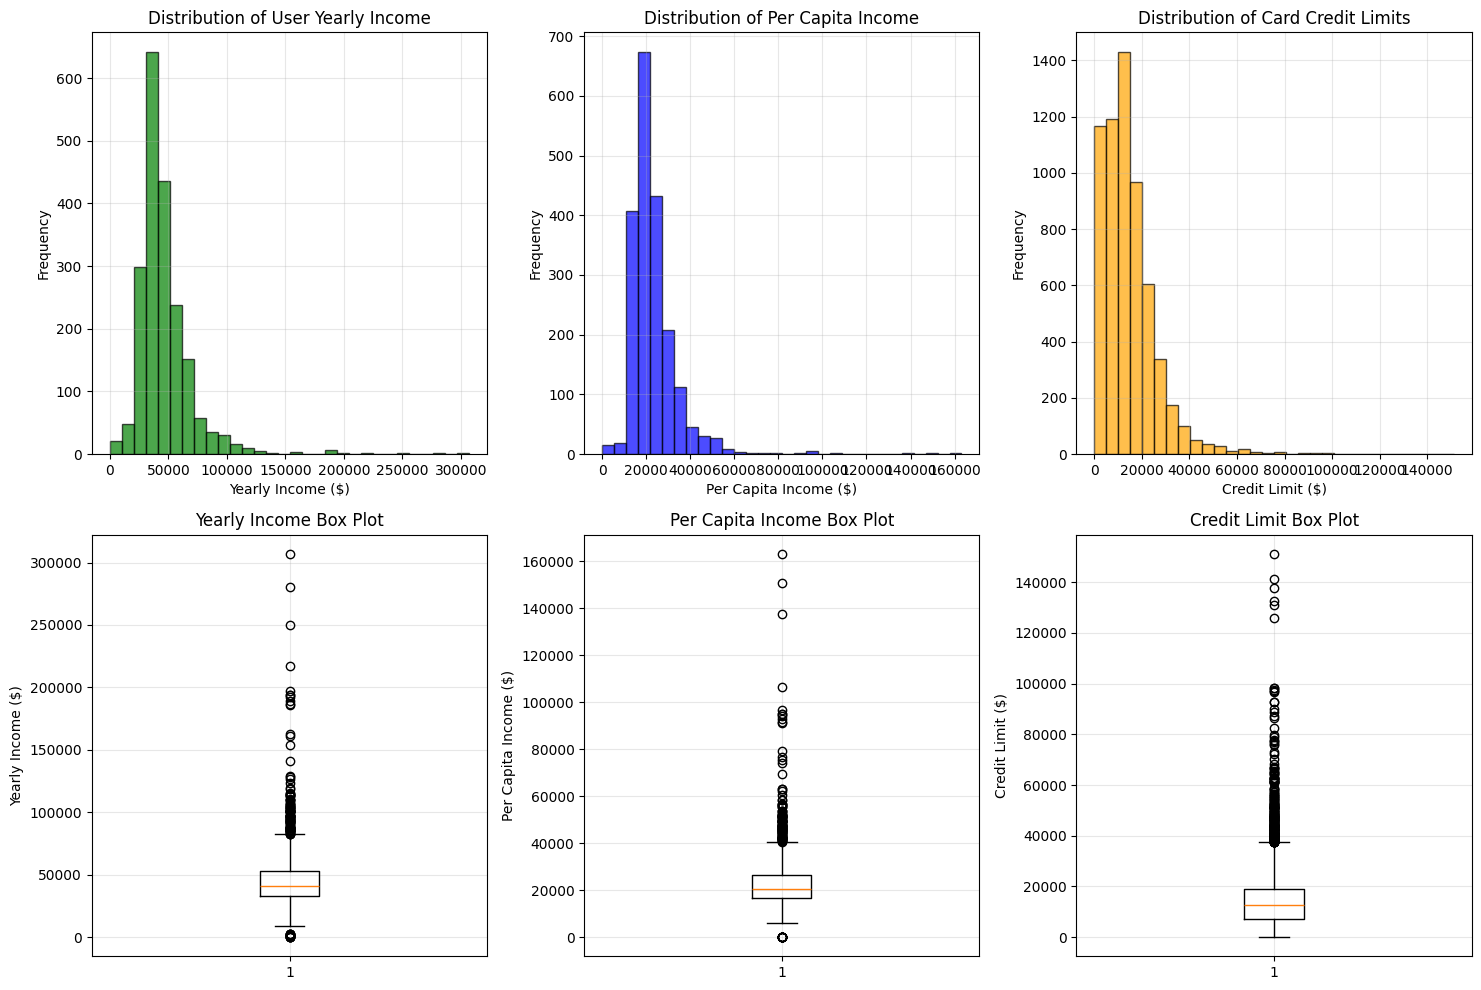


User Income Statistics:
       yearly_income_numeric  per_capita_income_numeric
count            2000.000000                2000.000000
mean            45715.882000               23141.928000
std             22992.615456               11324.137358
min                 1.000000                   0.000000
25%             32818.500000               16824.500000
50%             40744.500000               20581.000000
75%             52698.500000               26286.000000
max            307018.000000              163145.000000

Credit Limit Statistics:
count      6146.000000
mean      14347.493980
std       12014.463884
min           0.000000
25%        7042.750000
50%       12592.500000
75%       19156.500000
max      151223.000000
Name: credit_limit_numeric, dtype: float64


In [13]:
# EDA: Distribution of User Income and Card Limits
import matplotlib.pyplot as plt
import numpy as np

# Convert income and debt to numeric
users_df['yearly_income_numeric'] = pd.to_numeric(users_df['yearly_income'].str.replace('$', '').str.replace(',', ''), errors='coerce')
users_df['per_capita_income_numeric'] = pd.to_numeric(users_df['per_capita_income'].str.replace('$', '').str.replace(',', ''), errors='coerce')

# Convert credit limit to numeric
cards_df['credit_limit_numeric'] = pd.to_numeric(cards_df['credit_limit'].str.replace('$', '').str.replace(',', ''), errors='coerce')

plt.figure(figsize=(15, 10))

# Plot 1: User yearly income distribution
plt.subplot(2, 3, 1)
plt.hist(users_df['yearly_income_numeric'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('Yearly Income ($)')
plt.ylabel('Frequency')
plt.title('Distribution of User Yearly Income')
plt.grid(True, alpha=0.3)

# Plot 2: Per capita income distribution
plt.subplot(2, 3, 2)
plt.hist(users_df['per_capita_income_numeric'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='blue')
plt.xlabel('Per Capita Income ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Per Capita Income')
plt.grid(True, alpha=0.3)

# Plot 3: Credit limit distribution
plt.subplot(2, 3, 3)
plt.hist(cards_df['credit_limit_numeric'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Credit Limit ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Card Credit Limits')
plt.grid(True, alpha=0.3)

# Plot 4: Box plots
plt.subplot(2, 3, 4)
plt.boxplot(users_df['yearly_income_numeric'].dropna())
plt.ylabel('Yearly Income ($)')
plt.title('Yearly Income Box Plot')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
plt.boxplot(users_df['per_capita_income_numeric'].dropna())
plt.ylabel('Per Capita Income ($)')
plt.title('Per Capita Income Box Plot')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 6)
plt.boxplot(cards_df['credit_limit_numeric'].dropna())
plt.ylabel('Credit Limit ($)')
plt.title('Credit Limit Box Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nUser Income Statistics:")
print(users_df[['yearly_income_numeric', 'per_capita_income_numeric']].describe())
print("\nCredit Limit Statistics:")
print(cards_df['credit_limit_numeric'].describe())

FRAUD LABELS ANALYSIS

Fraud labels type: <class 'dict'>
Number of keys in fraud_labels: 1

First few keys: ['target']

First key: target
Value type for first key: <class 'dict'>

Total fraud labels extracted: 8914963

Fraud Label Counts:
No     8901631
Yes      13332
Name: count, dtype: int64

Fraud Proportions:
No     0.998505
Yes    0.001495
Name: count, dtype: float64


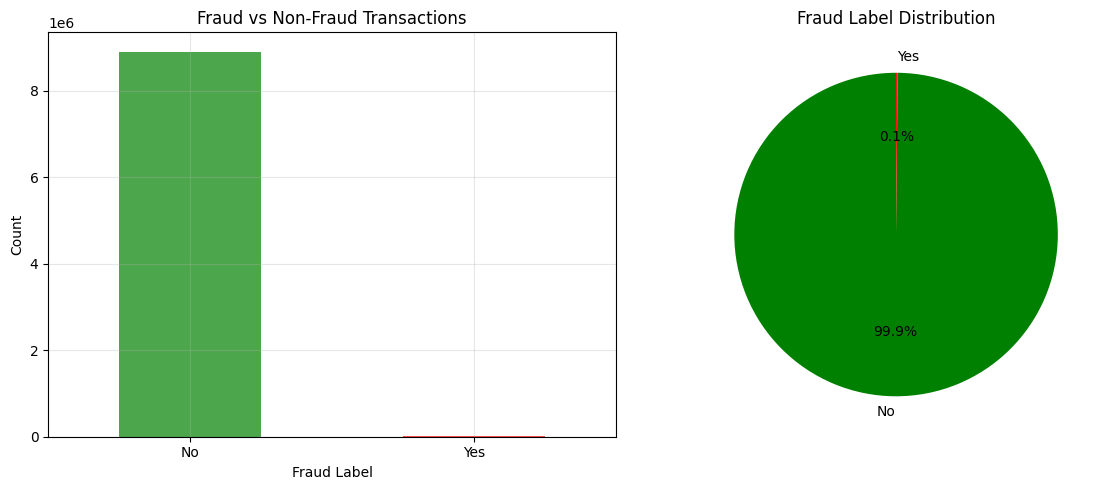

In [14]:
# EDA: Fraud Labels Analysis
import matplotlib.pyplot as plt
import numpy as np

print("="*80)
print("FRAUD LABELS ANALYSIS")
print("="*80)

# Since fraud_labels is likely a nested dictionary, let's explore its structure
print(f"\nFraud labels type: {type(fraud_labels)}")
print(f"Number of keys in fraud_labels: {len(fraud_labels)}")
print(f"\nFirst few keys: {list(fraud_labels.keys())[:5]}")

# If it's a nested dict, let's flatten it
if len(fraud_labels) > 0:
    first_key = list(fraud_labels.keys())[0]
    print(f"\nFirst key: {first_key}")
    print(f"Value type for first key: {type(fraud_labels[first_key])}")
    
    # If the value is itself a dict, extract all fraud labels
    fraud_values = []
    if isinstance(fraud_labels[first_key], dict):
        # Flatten nested dict
        for outer_key in fraud_labels:
            for inner_key, inner_value in fraud_labels[outer_key].items():
                fraud_values.append(inner_value)
        print(f"\nTotal fraud labels extracted: {len(fraud_values)}")
    else:
        fraud_values = list(fraud_labels.values())
        print(f"\nTotal fraud labels: {len(fraud_values)}")
    
    # Count fraud vs non-fraud
    if len(fraud_values) > 0:
        fraud_counts = pd.Series(fraud_values).value_counts()
        print(f"\nFraud Label Counts:")
        print(fraud_counts)
        print(f"\nFraud Proportions:")
        print(fraud_counts / len(fraud_values))
        
        # Visualize if there are labels
        if len(fraud_counts) > 1:
            plt.figure(figsize=(12, 5))
            
            # Bar plot
            plt.subplot(1, 2, 1)
            fraud_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7)
            plt.xlabel('Fraud Label')
            plt.ylabel('Count')
            plt.title('Fraud vs Non-Fraud Transactions')
            plt.xticks(rotation=0)
            plt.grid(True, alpha=0.3)
            
            # Pie chart
            plt.subplot(1, 2, 2)
            fraud_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
            plt.ylabel('')
            plt.title('Fraud Label Distribution')
            
            plt.tight_layout()
            plt.show()
        else:
            print("\nOnly one class found in fraud labels - cannot visualize class distribution.")
else:
    print("\nNo fraud labels found in the dataset.")

## 1. Customer Lifetime Value (LTV) Analysis

Aggregating transactions by customer...

Customer LTV Summary:
       total_revenue  avg_transaction  transaction_count  days_as_customer
count   1.219000e+03      1219.000000        1219.000000       1219.000000
mean    4.691022e+05        43.908960       10915.434783       3492.829368
std     2.926029e+05        17.477534        5607.355367        361.358439
min     2.660534e+04         5.340484         760.000000        853.000000
25%     2.696938e+05        32.223976        7223.500000       3590.000000
50%     3.988372e+05        40.720815        9832.000000       3591.000000
75%     5.977740e+05        52.548515       13349.000000       3591.000000
max     2.445773e+06       147.244145       48479.000000       3591.000000


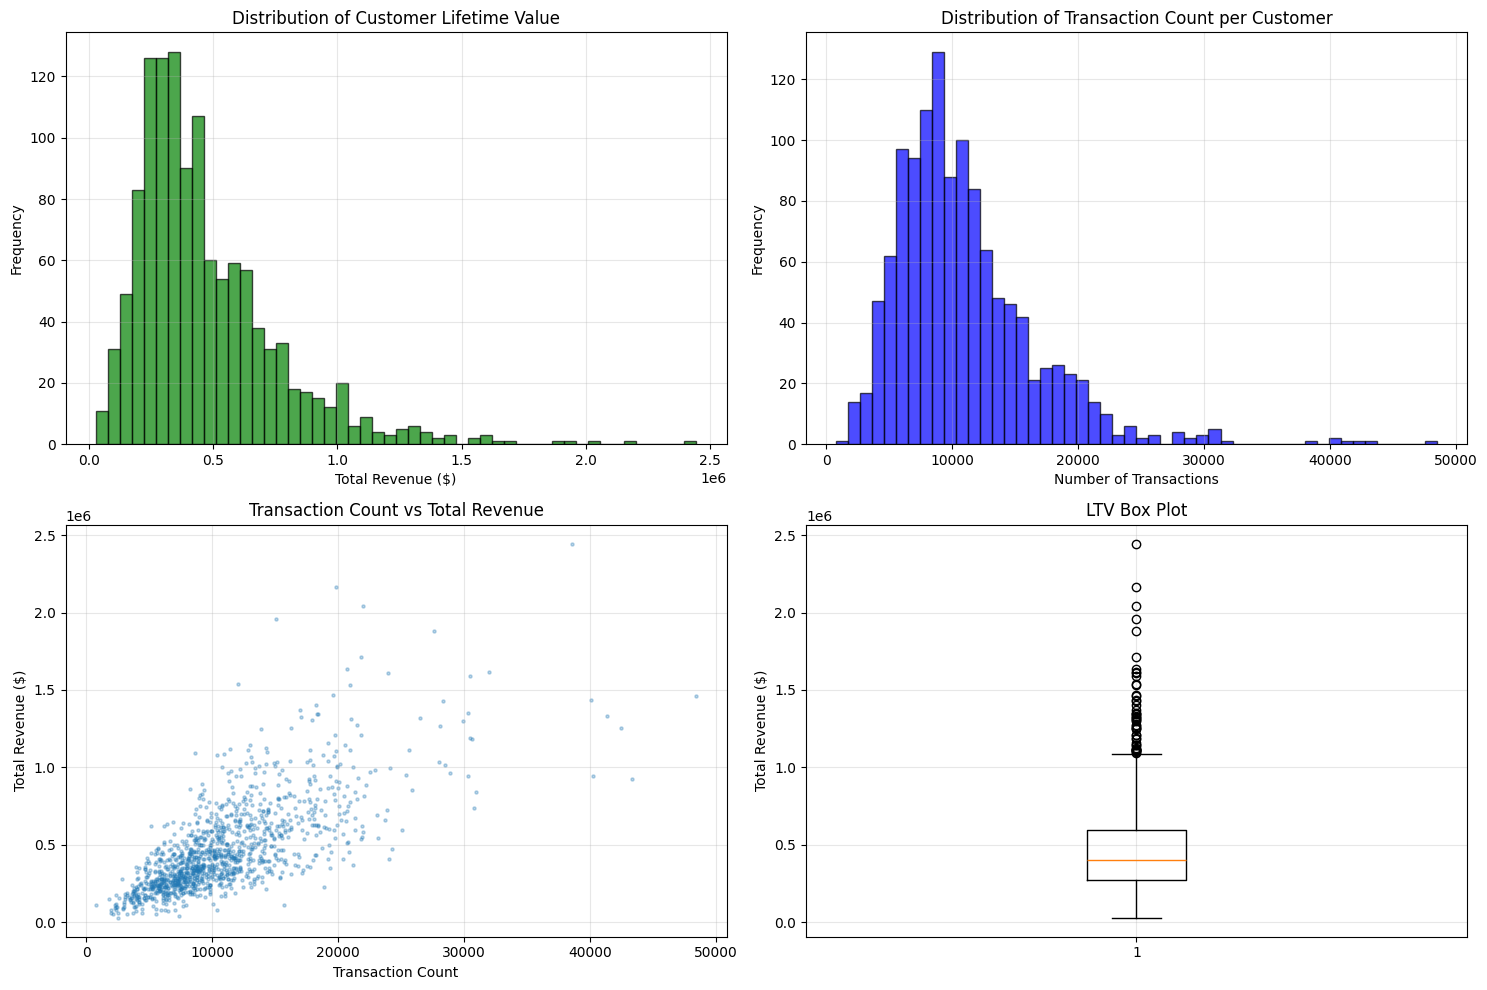


Top 10 Customers by LTV:
      client_id  total_revenue  transaction_count  days_as_customer
62           96     2445773.25              38617              3591
1028       1686     2167880.90              19810              3591
806        1340     2039921.23              22023              3591
507         840     1956340.84              15095              3591
283         464     1882901.35              27619              3591
301         490     1711482.69              21831              3591
422         704     1635022.05              20748              3591
182         285     1615458.99              32032              3591
299         488     1611114.42              23990              3591
698        1168     1590822.75              30520              3591


In [17]:
# Customer Lifetime Value Analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Aggregate transactions by customer
print("Aggregating transactions by customer...")
user_ltv = transactions_df.groupby('client_id').agg({
    'amount_numeric': ['sum', 'mean', 'count'],
    'date': ['min', 'max']
}).reset_index()

user_ltv.columns = ['client_id', 'total_revenue', 'avg_transaction', 'transaction_count', 'first_transaction', 'last_transaction']

# Calculate days as customer
user_ltv['first_transaction'] = pd.to_datetime(user_ltv['first_transaction'])
user_ltv['last_transaction'] = pd.to_datetime(user_ltv['last_transaction'])
user_ltv['days_as_customer'] = (user_ltv['last_transaction'] - user_ltv['first_transaction']).dt.days + 1

print(f"\nCustomer LTV Summary:")
print(user_ltv[['total_revenue', 'avg_transaction', 'transaction_count', 'days_as_customer']].describe())

# Visualize LTV distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(user_ltv['total_revenue'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 0].set_xlabel('Total Revenue ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Customer Lifetime Value')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(user_ltv['transaction_count'], bins=50, edgecolor='black', alpha=0.7, color='blue')
axes[0, 1].set_xlabel('Number of Transactions')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Transaction Count per Customer')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].scatter(user_ltv['transaction_count'], user_ltv['total_revenue'], alpha=0.3, s=5)
axes[1, 0].set_xlabel('Transaction Count')
axes[1, 0].set_ylabel('Total Revenue ($)')
axes[1, 0].set_title('Transaction Count vs Total Revenue')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].boxplot(user_ltv['total_revenue'])
axes[1, 1].set_ylabel('Total Revenue ($)')
axes[1, 1].set_title('LTV Box Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTop 10 Customers by LTV:")
print(user_ltv.nlargest(10, 'total_revenue')[['client_id', 'total_revenue', 'transaction_count', 'days_as_customer']])

## 2. Customer Segmentation

In [18]:
# RFM (Recency, Frequency, Monetary) Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import datetime

# Calculate reference date (most recent transaction date in dataset)
reference_date = user_ltv['last_transaction'].max()

# Engineer RFM features
print("Engineering RFM features...")
rfm_data = user_ltv.copy()
rfm_data['recency'] = (reference_date - rfm_data['last_transaction']).dt.days
rfm_data['frequency'] = rfm_data['transaction_count']
rfm_data['monetary'] = rfm_data['total_revenue']

print(f"\nRFM Features Summary:")
print(rfm_data[['recency', 'frequency', 'monetary']].describe())

# Normalize RFM features for clustering
print("\nNormalizing RFM features...")
scaler = StandardScaler()
rfm_features = rfm_data[['recency', 'frequency', 'monetary']]
rfm_normalized = scaler.fit_transform(rfm_features)

# K-means clustering (k=4)
print("Performing K-means clustering (k=4)...")
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm_data['cluster'] = kmeans.fit_predict(rfm_normalized)

print(f"\nCluster Assignment Complete!")
print(f"Number of customers per cluster:")
print(rfm_data['cluster'].value_counts().sort_index())

Engineering RFM features...

RFM Features Summary:
           recency     frequency      monetary
count  1219.000000   1219.000000  1.219000e+03
mean     14.091879  10915.434783  4.691022e+05
std     150.981745   5607.355367  2.926029e+05
min       0.000000    760.000000  2.660534e+04
25%       0.000000   7223.500000  2.696938e+05
50%       0.000000   9832.000000  3.988372e+05
75%       0.000000  13349.000000  5.977740e+05
max    2464.000000  48479.000000  2.445773e+06

Normalizing RFM features...
Performing K-means clustering (k=4)...

Cluster Assignment Complete!
Number of customers per cluster:
cluster
0    401
1      7
2    737
3     74
Name: count, dtype: int64


C:\Users\hp\miniconda3\envs\hp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


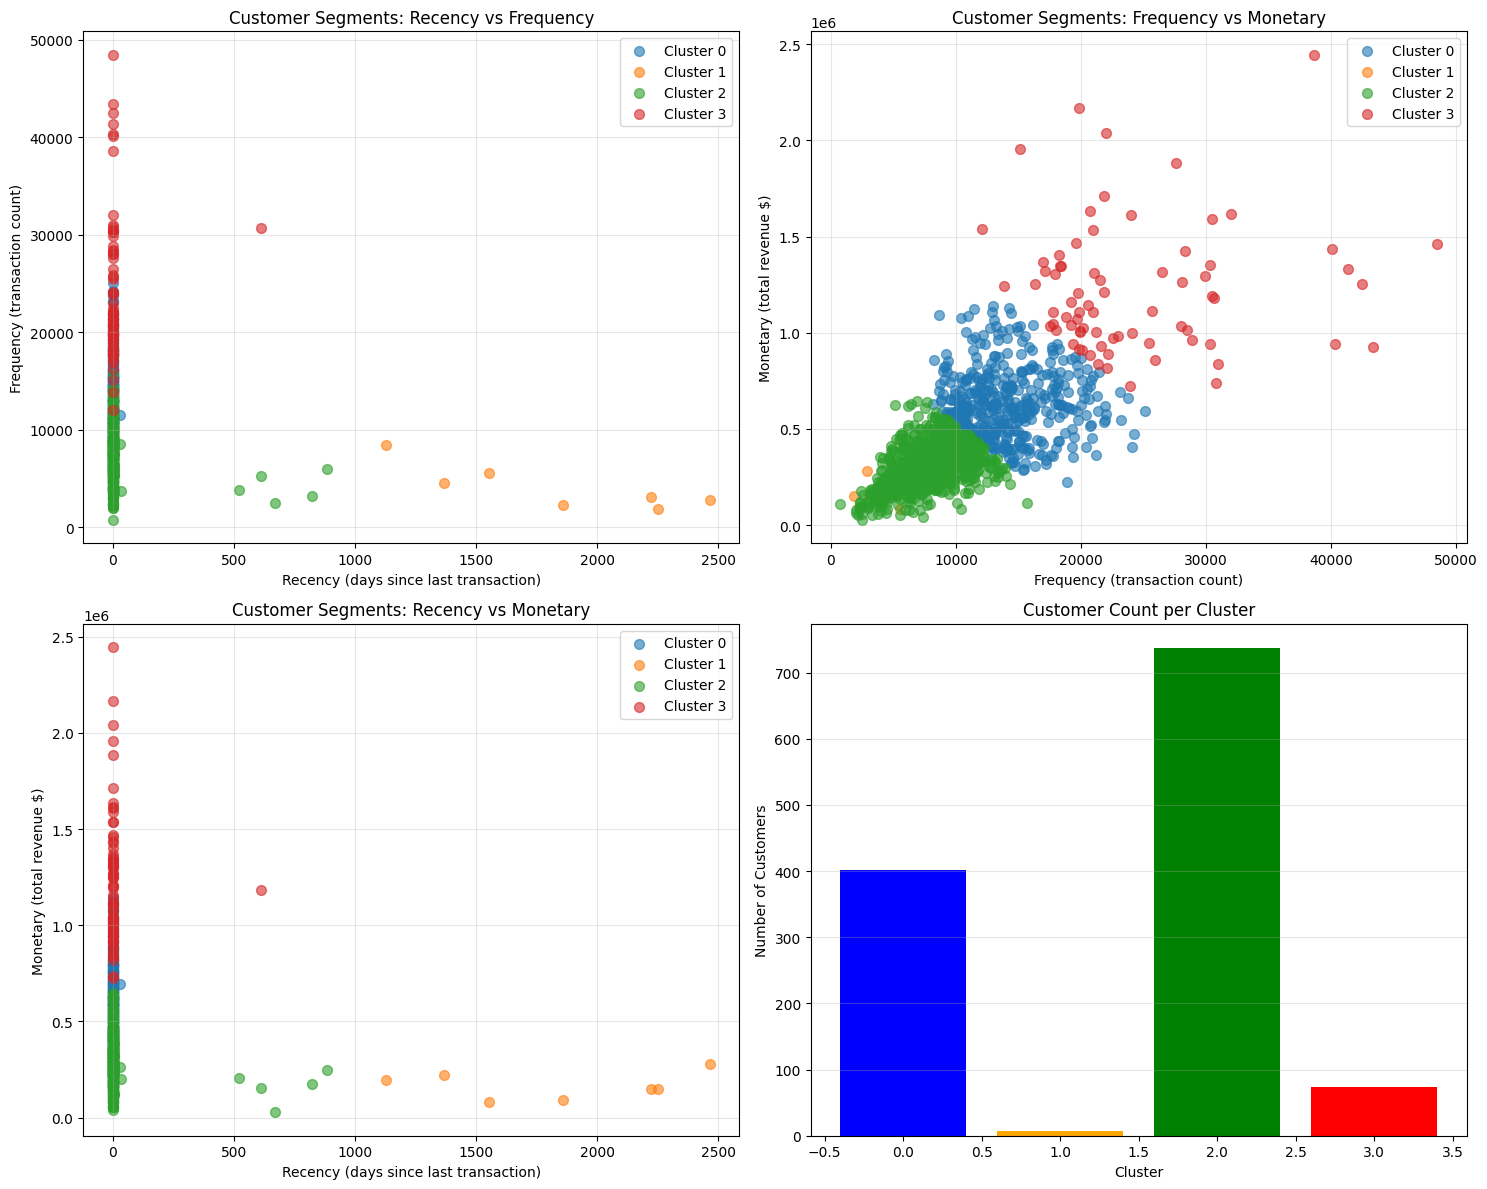

In [19]:
# Visualize customer segments
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Scatter plot: Recency vs Frequency
for cluster in range(4):
    cluster_data = rfm_data[rfm_data['cluster'] == cluster]
    axes[0, 0].scatter(cluster_data['recency'], cluster_data['frequency'], 
                       alpha=0.6, s=50, label=f'Cluster {cluster}')
axes[0, 0].set_xlabel('Recency (days since last transaction)')
axes[0, 0].set_ylabel('Frequency (transaction count)')
axes[0, 0].set_title('Customer Segments: Recency vs Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Scatter plot: Frequency vs Monetary
for cluster in range(4):
    cluster_data = rfm_data[rfm_data['cluster'] == cluster]
    axes[0, 1].scatter(cluster_data['frequency'], cluster_data['monetary'], 
                       alpha=0.6, s=50, label=f'Cluster {cluster}')
axes[0, 1].set_xlabel('Frequency (transaction count)')
axes[0, 1].set_ylabel('Monetary (total revenue $)')
axes[0, 1].set_title('Customer Segments: Frequency vs Monetary')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Scatter plot: Recency vs Monetary
for cluster in range(4):
    cluster_data = rfm_data[rfm_data['cluster'] == cluster]
    axes[1, 0].scatter(cluster_data['recency'], cluster_data['monetary'], 
                       alpha=0.6, s=50, label=f'Cluster {cluster}')
axes[1, 0].set_xlabel('Recency (days since last transaction)')
axes[1, 0].set_ylabel('Monetary (total revenue $)')
axes[1, 0].set_title('Customer Segments: Recency vs Monetary')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Bar chart: Cluster sizes
cluster_counts = rfm_data['cluster'].value_counts().sort_index()
axes[1, 1].bar(cluster_counts.index, cluster_counts.values, color=['blue', 'orange', 'green', 'red'])
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Number of Customers')
axes[1, 1].set_title('Customer Count per Cluster')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [20]:
# Display cluster centroids and statistics
print("\n=== Cluster Centroids (in original scale) ===")
cluster_centroids = rfm_data.groupby('cluster')[['recency', 'frequency', 'monetary']].mean()
print(cluster_centroids)

print("\n=== Cluster Statistics ===")
for cluster_id in range(4):
    cluster_subset = rfm_data[rfm_data['cluster'] == cluster_id]
    print(f"\n--- Cluster {cluster_id} ---")
    print(f"Number of customers: {len(cluster_subset)}")
    print(f"Average Recency: {cluster_subset['recency'].mean():.2f} days")
    print(f"Average Frequency: {cluster_subset['frequency'].mean():.2f} transactions")
    print(f"Average Monetary: ${cluster_subset['monetary'].mean():.2f}")
    print(f"Total Revenue: ${cluster_subset['monetary'].sum():.2f}")


=== Cluster Centroids (in original scale) ===
             recency     frequency      monetary
cluster                                         
0           0.087282  14313.366584  6.382674e+05
1        1834.714286   4071.571429  1.671659e+05
2           5.006784   7795.535957  3.044247e+05
3           8.243243  24222.216216  1.221069e+06

=== Cluster Statistics ===

--- Cluster 0 ---
Number of customers: 401
Average Recency: 0.09 days
Average Frequency: 14313.37 transactions
Average Monetary: $638267.44
Total Revenue: $255945245.06

--- Cluster 1 ---
Number of customers: 7
Average Recency: 1834.71 days
Average Frequency: 4071.57 transactions
Average Monetary: $167165.92
Total Revenue: $1170161.42

--- Cluster 2 ---
Number of customers: 737
Average Recency: 5.01 days
Average Frequency: 7795.54 transactions
Average Monetary: $304424.66
Total Revenue: $224360977.16

--- Cluster 3 ---
Number of customers: 74
Average Recency: 8.24 days
Average Frequency: 24222.22 transactions
Average Monet

## Section 3: Churn Prediction

In [22]:
# Define churn: users with no transactions in the final 180 days
# First, convert date column to datetime
transactions_df['date'] = pd.to_datetime(transactions_df['date'])

# Find the maximum date in the dataset
max_date = transactions_df['date'].max()
print(f"Maximum date in dataset: {max_date}")

# Calculate the cutoff date for churn (180 days before max date)
churn_cutoff = max_date - pd.Timedelta(days=180)
print(f"Churn cutoff date: {churn_cutoff}")

# For each customer, find their last transaction date
last_transaction = transactions_df.groupby('client_id')['date'].max()
print(f"\nNumber of customers: {len(last_transaction)}")

# Label customers as churned (1) if last transaction before cutoff, otherwise 0
churn_labels = (last_transaction < churn_cutoff).astype(int)
print(f"\nChurn distribution:")
print(churn_labels.value_counts())
print(f"\nChurn rate: {churn_labels.mean():.2%}")

Maximum date in dataset: 2019-10-31 23:59:00
Churn cutoff date: 2019-05-04 23:59:00

Number of customers: 1219

Churn distribution:
date
0    1206
1      13
Name: count, dtype: int64

Churn rate: 1.07%


In [23]:
# Prepare features: RFM + demographics
# Calculate RFM features for each customer
max_date_for_rfm = transactions_df['date'].max()

# Clean amount column - remove $ and convert to float
transactions_df['amount_clean'] = transactions_df['amount'].str.replace('$', '').str.replace(',', '').astype(float)

rfm_features = transactions_df.groupby('client_id').agg({
    'date': lambda x: (max_date_for_rfm - x.max()).days,  # Recency
    'id': 'count',  # Frequency
    'amount_clean': 'sum'  # Monetary
}).reset_index()

rfm_features.columns = ['client_id', 'recency', 'frequency', 'monetary']

print("RFM Features:")
print(rfm_features.head())
print(f"\nShape: {rfm_features.shape}")

# Merge with demographics from users_df
churn_data = rfm_features.merge(users_df, left_on='client_id', right_on='id', how='inner')
print(f"\nAfter merging with demographics: {churn_data.shape}")

# Add churn labels
churn_data = churn_data.merge(churn_labels.reset_index().rename(columns={'date': 'churned'}), 
                               left_on='client_id', right_on='client_id', how='inner')

print(f"\nFinal dataset shape: {churn_data.shape}")
print(f"Columns: {churn_data.columns.tolist()}")
print(f"\nSample data:")
print(churn_data.head())

RFM Features:
   client_id  recency  frequency   monetary
0          0        0      12795  625799.67
1          1        0      10073  336187.37
2          2        0      10612  291534.27
3          3        0       6001  280685.46
4          4        0      15043  595722.36

Shape: (1219, 4)

After merging with demographics: (1219, 20)

Final dataset shape: (1219, 21)
Columns: ['client_id', 'recency', 'frequency', 'monetary', 'id', 'current_age', 'retirement_age', 'birth_year', 'birth_month', 'gender', 'address', 'latitude', 'longitude', 'per_capita_income', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards', 'yearly_income_numeric', 'per_capita_income_numeric', 'churned']

Sample data:
   client_id  recency  frequency   monetary  id  current_age  retirement_age  \
0          0        0      12795  625799.67   0           33              69   
1          1        0      10073  336187.37   1           43              74   
2          2        0      10612  291534.27   

In [24]:
# Train/test split and logistic regression classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Select features for the model (RFM + demographics)
feature_cols = ['recency', 'frequency', 'monetary', 'current_age', 'credit_score', 'yearly_income_numeric', 'per_capita_income_numeric']

X = churn_data[feature_cols]
y = churn_data['churned']

print(f"Features shape: {X.shape}")
print(f"Target distribution:")
print(y.value_counts())

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTrain target distribution:")
print(y_train.value_counts())
print(f"\nTest target distribution:")
print(y_test.value_counts())

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
# Using class_weight='balanced' to handle imbalanced data
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

print("\nModel trained successfully!")

Features shape: (1219, 7)
Target distribution:
churned
0    1206
1      13
Name: count, dtype: int64

Training set size: 975
Test set size: 244

Train target distribution:
churned
0    965
1     10
Name: count, dtype: int64

Test target distribution:
churned
0    241
1      3
Name: count, dtype: int64

Model trained successfully!


=== Training Set Performance ===
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

 Not Churned       1.00      1.00      1.00       965
     Churned       1.00      1.00      1.00        10

    accuracy                           1.00       975
   macro avg       1.00      1.00      1.00       975
weighted avg       1.00      1.00      1.00       975


=== Test Set Performance ===
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

 Not Churned       1.00      1.00      1.00       241
     Churned       1.00      1.00      1.00         3

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244



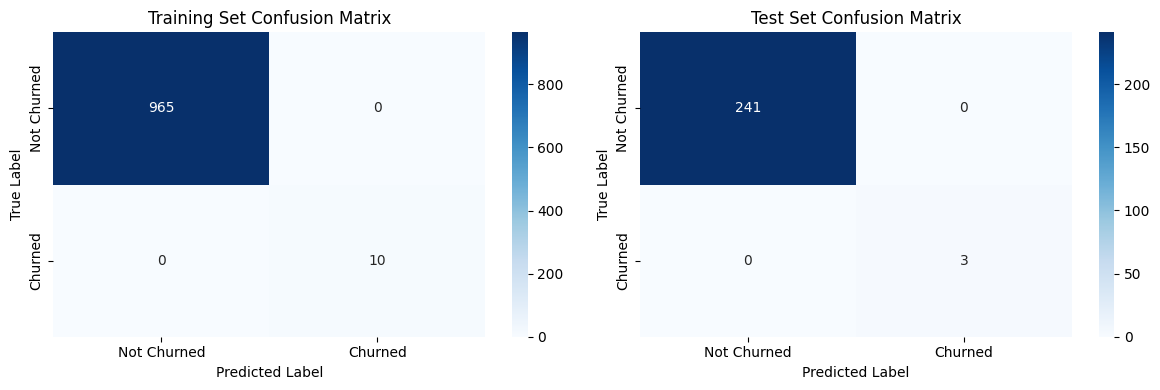


=== Model Summary ===
The logistic regression model was trained on 975 samples with 7 features.
Churn rate in dataset: 1.07%
Test set accuracy: 100.00%


In [25]:
# Evaluate model performance and show confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# Calculate confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Print classification reports
print("=== Training Set Performance ===")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_train, y_train_pred, target_names=['Not Churned', 'Churned']))

print("\n=== Test Set Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Not Churned', 'Churned'], zero_division=0))

# Visualize confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Training confusion matrix
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
axes[0].set_title('Training Set Confusion Matrix')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Test confusion matrix
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
axes[1].set_title('Test Set Confusion Matrix')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

print("\n=== Model Summary ===")
print(f"The logistic regression model was trained on {len(X_train)} samples with {X.shape[1]} features.")
print(f"Churn rate in dataset: {churn_labels.mean():.2%}")
print(f"Test set accuracy: {accuracy_score(y_test, y_test_pred):.2%}")

## Section 4: Financial Machine Learning (Expense Forecasting / Time Series)

In [27]:
# Aggregate monthly transaction totals per user
import pandas as pd
import numpy as np

# Use transactions_df with correct column names from the original data
# Columns: 'date', 'client_id', 'amount'
df_clean = transactions_df.copy()

# Clean and convert amount column (remove $ and convert to float)
df_clean['amount_clean'] = df_clean['amount'].str.replace('$', '').str.replace(',', '').astype(float)

# Ensure date is datetime
df_clean['date'] = pd.to_datetime(df_clean['date'])

# Create year-month column
df_clean['year_month'] = df_clean['date'].dt.to_period('M')

# Aggregate monthly spending per user
monthly_spending = df_clean.groupby(['client_id', 'year_month'])['amount_clean'].sum().reset_index()
monthly_spending.columns = ['customer_id', 'year_month', 'monthly_total']

# Find top user by total spending
top_user = df_clean.groupby('client_id')['amount_clean'].sum().idxmax()
print(f"Top spending user: {top_user}")
print(f"Total spending: ${df_clean[df_clean['client_id'] == top_user]['amount_clean'].sum():.2f}")

# Filter for top user's monthly spending
top_user_monthly = monthly_spending[monthly_spending['customer_id'] == top_user].copy()
top_user_monthly['year_month'] = top_user_monthly['year_month'].dt.to_timestamp()
top_user_monthly = top_user_monthly.sort_values('year_month')

print(f"\nTop user has {len(top_user_monthly)} months of transaction history")
print(top_user_monthly.head(10))

Top spending user: 96
Total spending: $2445773.25

Top user has 118 months of transaction history
      customer_id year_month  monthly_total
7041           96 2010-01-01       19324.98
7042           96 2010-02-01       22100.21
7043           96 2010-03-01       20656.94
7044           96 2010-04-01       20124.96
7045           96 2010-05-01       23407.71
7046           96 2010-06-01       21505.44
7047           96 2010-07-01       22657.92
7048           96 2010-08-01       22528.69
7049           96 2010-09-01       19553.64
7050           96 2010-10-01       20218.42


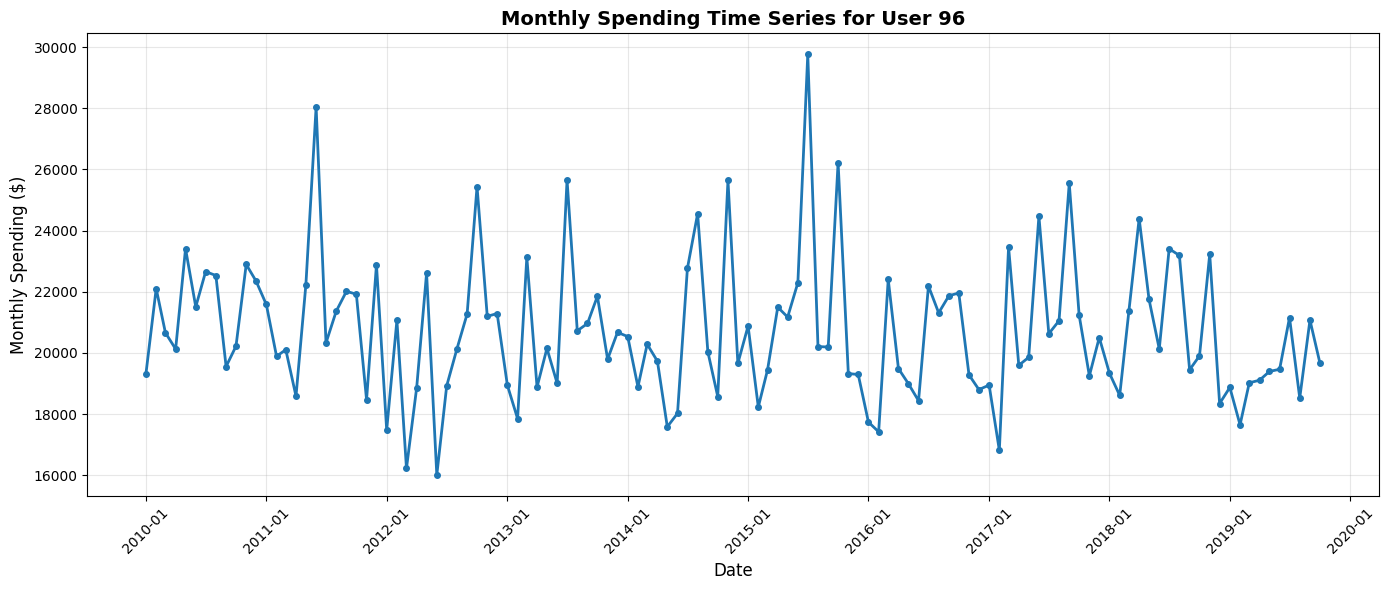


Monthly spending statistics for User 96:
Mean: $20726.89
Std: $2316.70
Min: $16008.26
Max: $29759.32


In [28]:
# Plot user's monthly spending time series
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))
plt.plot(top_user_monthly['year_month'], top_user_monthly['monthly_total'], marker='o', linewidth=2, markersize=4)
plt.title(f'Monthly Spending Time Series for User {top_user}', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Monthly Spending ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nMonthly spending statistics for User {top_user}:")
print(f"Mean: ${top_user_monthly['monthly_total'].mean():.2f}")
print(f"Std: ${top_user_monthly['monthly_total'].std():.2f}")
print(f"Min: ${top_user_monthly['monthly_total'].min():.2f}")
print(f"Max: ${top_user_monthly['monthly_total'].max():.2f}")

In [30]:
# Install statsmodels for ARIMA
!pip install statsmodels -q

print("statsmodels installed successfully!")

statsmodels installed successfully!


In [31]:
# Fit ARIMA model and forecast next 12 months
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Prepare time series data
ts_data = top_user_monthly.set_index('year_month')['monthly_total']

# Fit ARIMA model (using simple parameters: p=1, d=1, q=1)
print("Fitting ARIMA(1,1,1) model...")
model = ARIMA(ts_data, order=(1, 1, 1))
model_fit = model.fit()

print("\nModel Summary:")
print(model_fit.summary())

# Forecast next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Create forecast dates
last_date = ts_data.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')

print(f"\n\nForecasted monthly spending for next {forecast_steps} months:")
for date, value in zip(forecast_dates, forecast):
    print(f"{date.strftime('%Y-%m')}: ${value:.2f}")

Fitting ARIMA(1,1,1) model...

Model Summary:
                               SARIMAX Results                                
Dep. Variable:          monthly_total   No. Observations:                  118
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1088.432
Date:                Tue, 30 Sep 2025   AIC                           2182.865
Time:                        13:16:16   BIC                           2191.151
Sample:                    01-01-2010   HQIC                          2186.229
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2158      0.089      2.428      0.015       0.042       0.390
ma.L1         -1.0000      0.112     -8.935      0.000      -1.219      -0.781
sigma2

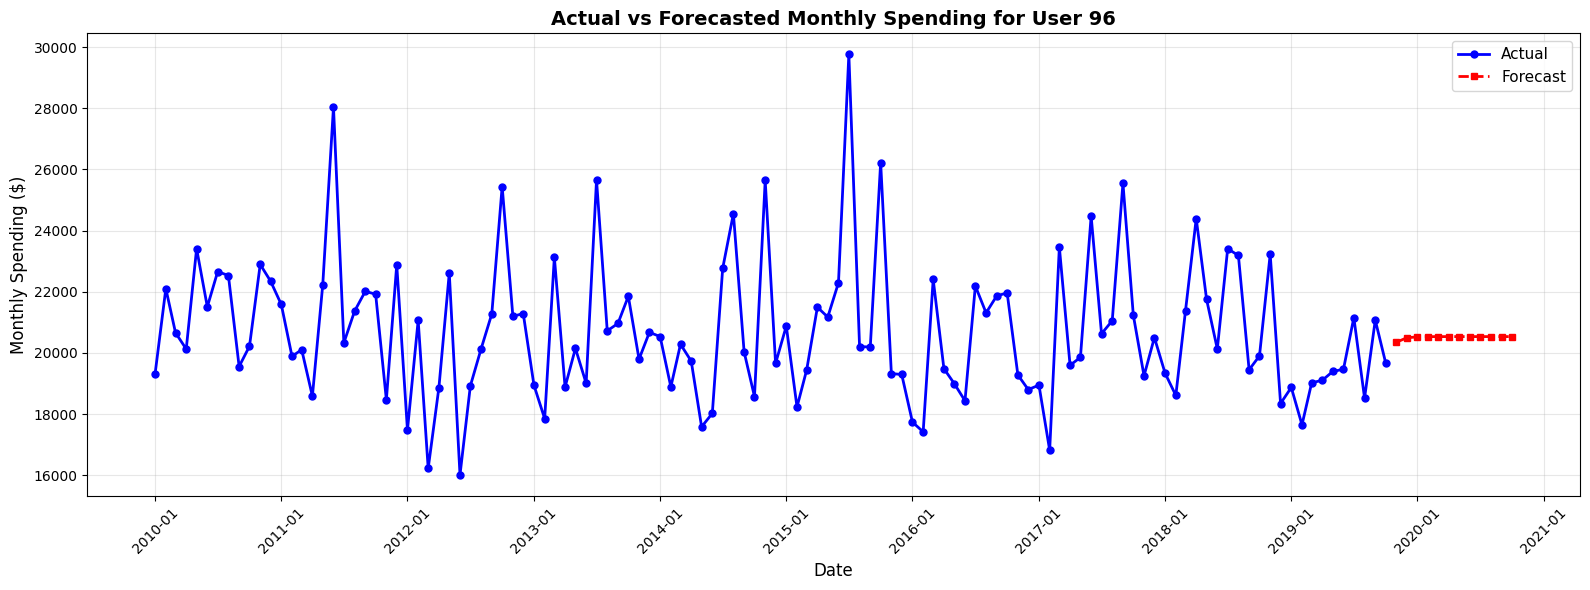


=== Forecast Summary ===
Actual average (last 12 months): $19624.18
Forecasted average (next 12 months): $20512.36

Total forecasted spending for next 12 months: $246148.27


In [32]:
# Visualize actual vs forecasted expenses
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create forecast dataframe
forecast_df = pd.DataFrame({
    'date': forecast_dates,
    'forecast': forecast
})

# Plot
fig, ax = plt.figure(figsize=(16, 6)), plt.gca()
plt.plot(top_user_monthly['year_month'], top_user_monthly['monthly_total'], 
         marker='o', linewidth=2, markersize=5, label='Actual', color='blue')
plt.plot(forecast_df['date'], forecast_df['forecast'], 
         marker='s', linewidth=2, markersize=5, label='Forecast', color='red', linestyle='--')

plt.title(f'Actual vs Forecasted Monthly Spending for User {top_user}', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Monthly Spending ($)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n=== Forecast Summary ===")
print(f"Actual average (last 12 months): ${top_user_monthly['monthly_total'].tail(12).mean():.2f}")
print(f"Forecasted average (next 12 months): ${forecast.mean():.2f}")
print(f"\nTotal forecasted spending for next 12 months: ${forecast.sum():.2f}")

## Data Reference: Available DataFrames and Columns

This section lists all currently loaded DataFrames to guide fraud detection data preparation.

In [33]:
# List all DataFrame variables and their columns
import pandas as pd

print("=" * 80)
print("AVAILABLE DATAFRAMES AND THEIR COLUMNS")
print("=" * 80)

# Get all variables in the namespace
all_vars = dir()

# Filter for DataFrame objects
df_count = 0
for var_name in sorted(all_vars):
    # Skip private/magic variables
    if var_name.startswith('_'):
        continue
    
    try:
        var_obj = eval(var_name)
        if isinstance(var_obj, pd.DataFrame):
            df_count += 1
            print(f"\n{df_count}. DataFrame: '{var_name}'")
            print(f"   Shape: {var_obj.shape} (rows, columns)")
            print(f"   Columns ({len(var_obj.columns)}):")
            for col in var_obj.columns:
                dtype = var_obj[col].dtype
                print(f"      - {col} ({dtype})")
    except:
        pass

print("\n" + "=" * 80)
print(f"Total DataFrames found: {df_count}")
print("=" * 80)

AVAILABLE DATAFRAMES AND THEIR COLUMNS

1. DataFrame: 'X'
   Shape: (1219, 7) (rows, columns)
   Columns (7):
      - recency (int64)
      - frequency (int64)
      - monetary (float64)
      - current_age (int64)
      - credit_score (int64)
      - yearly_income_numeric (int64)
      - per_capita_income_numeric (int64)

2. DataFrame: 'X_test'
   Shape: (244, 7) (rows, columns)
   Columns (7):
      - recency (int64)
      - frequency (int64)
      - monetary (float64)
      - current_age (int64)
      - credit_score (int64)
      - yearly_income_numeric (int64)
      - per_capita_income_numeric (int64)

3. DataFrame: 'X_train'
   Shape: (975, 7) (rows, columns)
   Columns (7):
      - recency (int64)
      - frequency (int64)
      - monetary (float64)
      - current_age (int64)
      - credit_score (int64)
      - yearly_income_numeric (int64)
      - per_capita_income_numeric (int64)

4. DataFrame: 'cards_df'
   Shape: (6146, 14) (rows, columns)
   Columns (14):
      - id (int64

## Fraud Detection Analysis

This section implements a fraud detection model using transaction data.

In [34]:
# Step 1: Load fraud labels and merge with transactions
import pandas as pd
import numpy as np

# Load fraud labels (assuming there's a fraud_labels.csv file)
try:
    fraud_labels = pd.read_csv('fraud_labels.csv')
    print(f"Fraud labels loaded: {fraud_labels.shape}")
    print(f"Fraud labels columns: {list(fraud_labels.columns)}")
    print(f"\nFirst few rows:")
    print(fraud_labels.head())
except FileNotFoundError:
    print("fraud_labels.csv not found. Checking for alternative fraud data sources...")
    # Check if 'errors' column in transactions_df can be used as fraud indicator
    if 'errors' in transactions_df.columns:
        print("\nUsing 'errors' column from transactions_df as fraud indicator")
        print(f"Unique error values: {transactions_df['errors'].unique()}")
        print(f"Error value counts:\n{transactions_df['errors'].value_counts()}")
    else:
        print("No fraud label source found.")
        fraud_labels = None

fraud_labels.csv not found. Checking for alternative fraud data sources...

Using 'errors' column from transactions_df as fraud indicator
Unique error values: [nan 'Technical Glitch' 'Bad Expiration' 'Bad Card Number'
 'Insufficient Balance' 'Bad PIN' 'Bad CVV' 'Bad Zipcode'
 'Insufficient Balance,Technical Glitch' 'Bad PIN,Insufficient Balance'
 'Bad PIN,Technical Glitch' 'Bad Expiration,Technical Glitch'
 'Bad Card Number,Bad Expiration' 'Bad Card Number,Insufficient Balance'
 'Bad Expiration,Insufficient Balance' 'Bad Card Number,Bad CVV'
 'Bad CVV,Technical Glitch' 'Bad Expiration,Bad CVV'
 'Bad CVV,Insufficient Balance' 'Bad Card Number,Technical Glitch'
 'Bad Zipcode,Insufficient Balance'
 'Bad Card Number,Bad Expiration,Insufficient Balance'
 'Bad Zipcode,Technical Glitch']
Error value counts:
errors
Insufficient Balance                                   130902
Bad PIN                                                 32119
Technical Glitch                                        2

In [35]:
# Step 2: Create binary fraud column and show class distribution
# Create fraud column: transactions with errors are considered fraud
fraud_data = transactions_df.copy()
fraud_data['is_fraud'] = fraud_data['errors'].notna().astype(int)

print("\n" + "="*80)
print("FRAUD CLASS DISTRIBUTION")
print("="*80)
print(f"\nTotal transactions: {len(fraud_data):,}")
print(f"\nFraud class distribution:")
print(fraud_data['is_fraud'].value_counts())
print(f"\nFraud percentage: {fraud_data['is_fraud'].mean()*100:.2f}%")
print("="*80)


FRAUD CLASS DISTRIBUTION

Total transactions: 13,305,915

Fraud class distribution:
is_fraud
0    13094522
1      211393
Name: count, dtype: int64

Fraud percentage: 1.59%


In [36]:
# Step 3: Sample 10k rows stratified by fraud for faster modeling
from sklearn.model_selection import train_test_split

# Remove rows with missing values in key features
fraud_data_clean = fraud_data.dropna(subset=['amount_numeric', 'use_chip', 'mcc', 'merchant_id', 'card_id'])

print(f"\nAfter removing missing values: {len(fraud_data_clean):,} transactions")

# Stratified sampling
sample_size = 10000
fraud_sample = fraud_data_clean.groupby('is_fraud', group_keys=False).apply(
    lambda x: x.sample(n=min(len(x), int(sample_size * len(x) / len(fraud_data_clean))), random_state=42)
)

print(f"\nSampled {len(fraud_sample):,} transactions for modeling")
print(f"\nSampled fraud distribution:")
print(fraud_sample['is_fraud'].value_counts())
print(f"Fraud percentage in sample: {fraud_sample['is_fraud'].mean()*100:.2f}%")


After removing missing values: 13,305,915 transactions

Sampled 9,999 transactions for modeling

Sampled fraud distribution:
is_fraud
0    9841
1     158
Name: count, dtype: int64
Fraud percentage in sample: 1.58%


In [37]:
# Step 4: Prepare features and encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Select features
feature_cols = ['amount_numeric', 'use_chip', 'mcc', 'merchant_id', 'card_id']

# Encode categorical 'use_chip' variable
le = LabelEncoder()
fraud_sample['use_chip_encoded'] = le.fit_transform(fraud_sample['use_chip'])

# Prepare X and y
X = fraud_sample[['amount_numeric', 'use_chip_encoded', 'mcc', 'merchant_id', 'card_id']]
y = fraud_sample['is_fraud']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")
print(f"\nFirst few rows of features:")
print(X.head())


Feature matrix shape: (9999, 5)
Target variable shape: (9999,)

Feature columns: ['amount_numeric', 'use_chip_encoded', 'mcc', 'merchant_id', 'card_id']

First few rows of features:
         amount_numeric  use_chip_encoded   mcc  merchant_id  card_id
8632366           10.82                 2  4214        83271      297
8290028           94.87                 2  5541        26810     2660
5864931           55.00                 2  5541        22204       13
6189516            7.60                 2  5411        75781     2171
9509217           16.69                 2  5912        69161     1262


In [38]:
# Step 5: Train/test split and train RandomForest with class_weight='balanced'
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n" + "="*80)
print("TRAIN/TEST SPLIT")
print("="*80)
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Training fraud %: {y_train.mean()*100:.2f}%")
print(f"Test fraud %: {y_test.mean()*100:.2f}%")

# Train RandomForest with class_weight='balanced'
print("\n" + "="*80)
print("TRAINING RANDOM FOREST MODEL")
print("="*80)
print("Training model with class_weight='balanced'...")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train, y_train)

print("Model training completed!")
print("="*80)


TRAIN/TEST SPLIT
Training set size: 7999
Test set size: 2000
Training fraud %: 1.58%
Test fraud %: 1.60%

TRAINING RANDOM FOREST MODEL
Training model with class_weight='balanced'...
Model training completed!


In [39]:
# Step 6: Evaluate model - ROC-AUC and Confusion Matrix
# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n" + "="*80)
print("MODEL EVALUATION")
print("="*80)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(cm)
print(f"\nTrue Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))
print("="*80)


MODEL EVALUATION

ROC-AUC Score: 0.5558

Confusion Matrix:
[[1968    0]
 [  32    0]]

True Negatives: 1968
False Positives: 0
False Negatives: 32
True Positives: 0

Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.98      1.00      0.99      1968
       Fraud       0.00      0.00      0.00        32

    accuracy                           0.98      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.97      0.98      0.98      2000




FEATURE IMPORTANCES


         feature  importance
  amount_numeric    0.366080
         card_id    0.274764
     merchant_id    0.181436
             mcc    0.139779
use_chip_encoded    0.037942



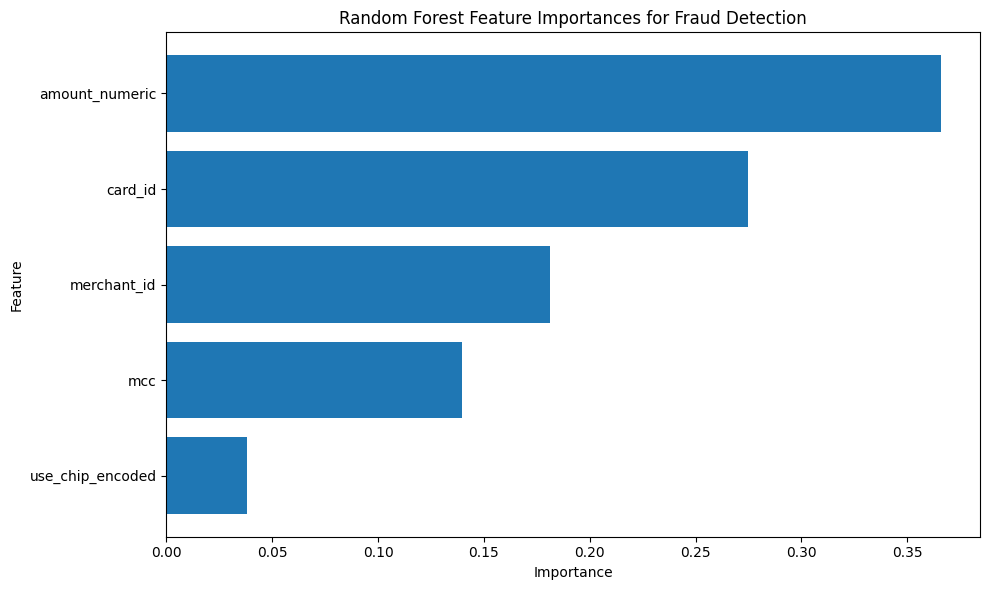


Fraud detection analysis completed successfully!


In [40]:
# Step 7: Display Feature Importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*80)
print("FEATURE IMPORTANCES")
print("="*80)
print("\n")
print(feature_importance.to_string(index=False))
print("\n" + "="*80)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances for Fraud Detection')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nFraud detection analysis completed successfully!")

# Project Summary - Comprehensive Visualizations

This section provides a comprehensive visual summary of the entire Customer Lifetime Value (LTV) and Fraud Detection project, including:
- Customer churn analysis
- Customer segmentation insights
- Top customers by LTV
- Transaction patterns over time
- Fraud detection metrics
- Feature correlation analysis

In [42]:
# First, let's check what variables are available and prepare summary data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Convert date column to datetime if not already
transactions_df['date'] = pd.to_datetime(transactions_df['date'])

# Clean amount column by removing $ and converting to float
transactions_df['amount_clean'] = transactions_df['amount'].str.replace('$', '').str.replace(',', '').astype(float)

# Create a flag for whether transaction uses chip
transactions_df['uses_chip'] = (transactions_df['use_chip'] == 'Chip Transaction').astype(int)

print("Data preparation complete!")
print(f"Total transactions: {len(transactions_df)}")
print(f"Total customers: {transactions_df['client_id'].nunique()}")
print(f"Date range: {transactions_df['date'].min()} to {transactions_df['date'].max()}")

Data preparation complete!
Total transactions: 13305915
Total customers: 1219
Date range: 2010-01-01 00:01:00 to 2019-10-31 23:59:00


1. TRANSACTION VOLUME OVER TIME


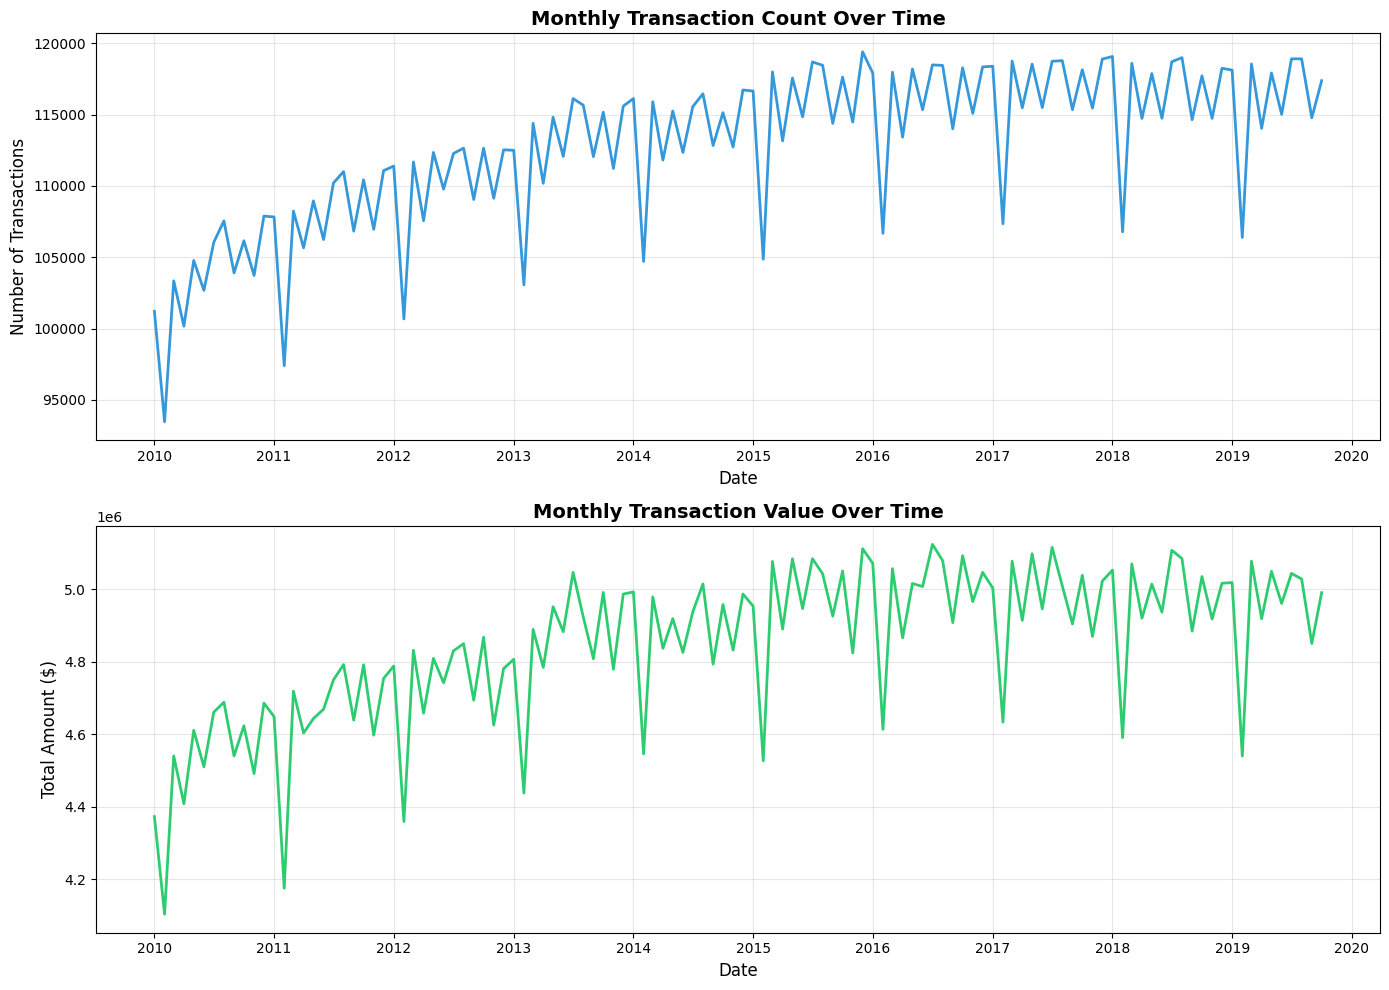


Average monthly transactions: 112762
Average monthly revenue: $4,846,063.75


In [43]:
# 1. Transaction Volume Over Time
print("="*80)
print("1. TRANSACTION VOLUME OVER TIME")
print("="*80)

# Aggregate transactions by month
transactions_df['year_month'] = transactions_df['date'].dt.to_period('M')
monthly_trans = transactions_df.groupby('year_month').agg({
    'id': 'count',
    'amount_clean': 'sum'
}).reset_index()
monthly_trans['year_month'] = monthly_trans['year_month'].dt.to_timestamp()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Transaction count over time
ax1.plot(monthly_trans['year_month'], monthly_trans['id'], color='#3498db', linewidth=2)
ax1.set_title('Monthly Transaction Count Over Time', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Number of Transactions', fontsize=12)
ax1.grid(True, alpha=0.3)

# Transaction value over time
ax2.plot(monthly_trans['year_month'], monthly_trans['amount_clean'], color='#2ecc71', linewidth=2)
ax2.set_title('Monthly Transaction Value Over Time', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Total Amount ($)', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nAverage monthly transactions: {monthly_trans['id'].mean():.0f}")
print(f"Average monthly revenue: ${monthly_trans['amount_clean'].mean():,.2f}")


2. TOP 10 CUSTOMERS BY LIFETIME VALUE


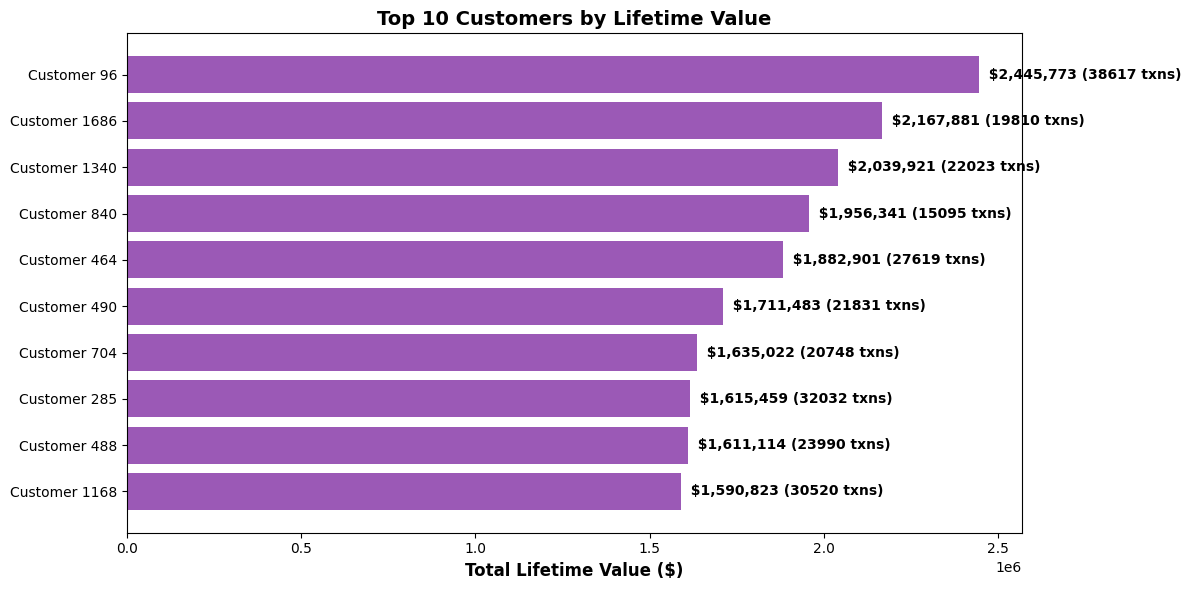


Top customer LTV: $2,445,773.25
Average top 10 LTV: $1,865,671.85
Total LTV (all customers): $571,835,522.28


In [44]:
# 2. Top 10 Customers by Lifetime Value (LTV)
print("\n" + "="*80)
print("2. TOP 10 CUSTOMERS BY LIFETIME VALUE")
print("="*80)

# Calculate LTV per customer
customer_ltv = transactions_df.groupby('client_id').agg({
    'amount_clean': 'sum',
    'id': 'count'
}).reset_index()
customer_ltv.columns = ['client_id', 'total_spend', 'num_transactions']
customer_ltv = customer_ltv.sort_values('total_spend', ascending=False)

# Get top 10
top10_customers = customer_ltv.head(10)

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(range(len(top10_customers)), top10_customers['total_spend'], color='#9b59b6')
ax.set_yticks(range(len(top10_customers)))
ax.set_yticklabels([f'Customer {int(id)}' for id in top10_customers['client_id']])
ax.set_xlabel('Total Lifetime Value ($)', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Customers by Lifetime Value', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Add value labels
for i, (val, trans) in enumerate(zip(top10_customers['total_spend'], top10_customers['num_transactions'])):
    ax.text(val, i, f'  ${val:,.0f} ({int(trans)} txns)', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTop customer LTV: ${top10_customers['total_spend'].iloc[0]:,.2f}")
print(f"Average top 10 LTV: ${top10_customers['total_spend'].mean():,.2f}")
print(f"Total LTV (all customers): ${customer_ltv['total_spend'].sum():,.2f}")

In [45]:
# 3. Fraud Rate by Merchant Category (MCC)
print("\n" + "="*80)
print("3. FRAUD ANALYSIS BY MERCHANT CATEGORY")
print("="*80)

# Add fraud labels to transactions
fraud_dict = {int(k): v for k, v in fraud_labels.items()}
transactions_df['is_fraud'] = transactions_df['id'].map(fraud_dict).fillna(0).astype(int)

# Calculate fraud rate by MCC
mcc_fraud = transactions_df.groupby('mcc').agg({
    'is_fraud': ['sum', 'count']
}).reset_index()
mcc_fraud.columns = ['mcc', 'fraud_count', 'total_count']
mcc_fraud['fraud_rate'] = (mcc_fraud['fraud_count'] / mcc_fraud['total_count'] * 100)
mcc_fraud = mcc_fraud[mcc_fraud['total_count'] >= 1000]  # Filter categories with sufficient data
mcc_fraud = mcc_fraud.sort_values('fraud_rate', ascending=False).head(15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Fraud rate by category
ax1.barh(range(len(mcc_fraud)), mcc_fraud['fraud_rate'], color='#e74c3c')
ax1.set_yticks(range(len(mcc_fraud)))
ax1.set_yticklabels([f'MCC {int(m)}' for m in mcc_fraud['mcc']])
ax1.set_xlabel('Fraud Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 Merchant Categories by Fraud Rate', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Overall fraud distribution pie chart
fraud_summary = transactions_df['is_fraud'].value_counts()
colors = ['#2ecc71', '#e74c3c']
ax2.pie(fraud_summary.values, labels=['Legitimate', 'Fraudulent'], autopct='%1.2f%%',
        startangle=90, colors=colors, explode=(0, 0.1))
ax2.set_title('Overall Fraud Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTotal fraudulent transactions: {fraud_summary[1]:,}")
print(f"Total legitimate transactions: {fraud_summary[0]:,}")
print(f"Overall fraud rate: {fraud_summary[1]/fraud_summary.sum()*100:.3f}%")


3. FRAUD ANALYSIS BY MERCHANT CATEGORY


ValueError: invalid literal for int() with base 10: 'target'


3. FRAUD ANALYSIS BY MERCHANT CATEGORY


ValueError: 'labels' must be of length 'x', not 2

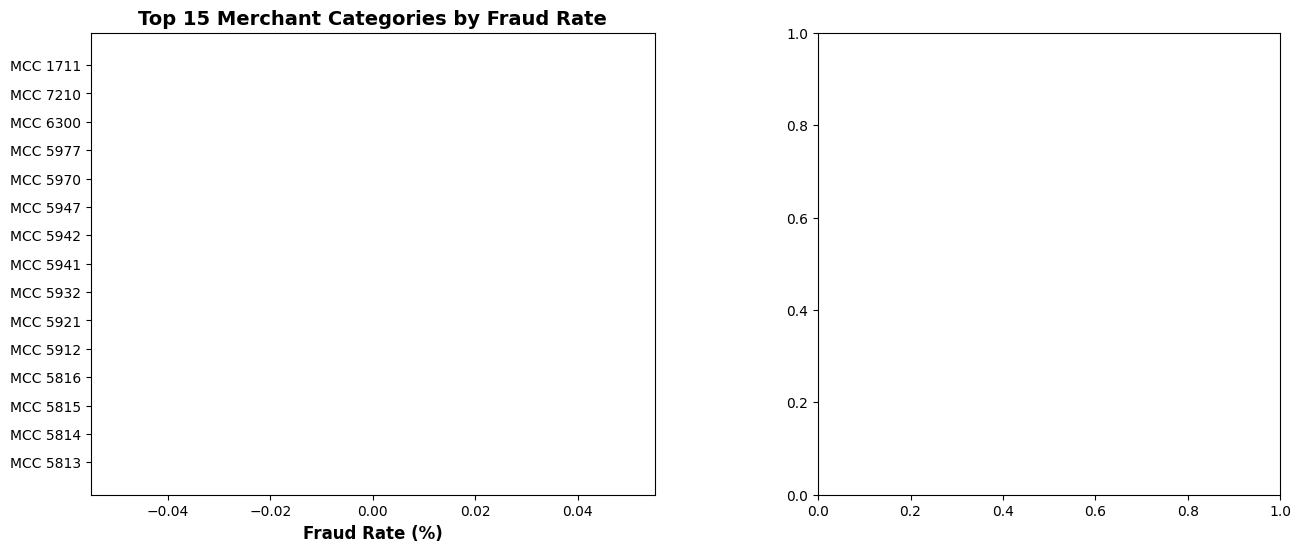

In [46]:
# 3. Fraud Rate by Merchant Category (MCC) - Fixed
print("\n" + "="*80)
print("3. FRAUD ANALYSIS BY MERCHANT CATEGORY")
print("="*80)

# Parse fraud_labels correctly - skip header row
fraud_dict = {}
for k, v in fraud_labels.items():
    if k != 'target':  # Skip header
        fraud_dict[int(k)] = int(v)

transactions_df['is_fraud'] = transactions_df['id'].map(fraud_dict).fillna(0).astype(int)

# Calculate fraud rate by MCC
mcc_fraud = transactions_df.groupby('mcc').agg({
    'is_fraud': ['sum', 'count']
}).reset_index()
mcc_fraud.columns = ['mcc', 'fraud_count', 'total_count']
mcc_fraud['fraud_rate'] = (mcc_fraud['fraud_count'] / mcc_fraud['total_count'] * 100)
mcc_fraud = mcc_fraud[mcc_fraud['total_count'] >= 1000]  # Filter categories with sufficient data
mcc_fraud = mcc_fraud.sort_values('fraud_rate', ascending=False).head(15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Fraud rate by category
ax1.barh(range(len(mcc_fraud)), mcc_fraud['fraud_rate'], color='#e74c3c')
ax1.set_yticks(range(len(mcc_fraud)))
ax1.set_yticklabels([f'MCC {int(m)}' for m in mcc_fraud['mcc']])
ax1.set_xlabel('Fraud Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 Merchant Categories by Fraud Rate', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Overall fraud distribution pie chart
fraud_summary = transactions_df['is_fraud'].value_counts()
colors = ['#2ecc71', '#e74c3c']
ax2.pie(fraud_summary.values, labels=['Legitimate', 'Fraudulent'], autopct='%1.2f%%',
        startangle=90, colors=colors, explode=(0, 0.1))
ax2.set_title('Overall Fraud Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTotal fraudulent transactions: {fraud_summary.get(1, 0):,}")
print(f"Total legitimate transactions: {fraud_summary.get(0, 0):,}")
if 1 in fraud_summary.index:
    print(f"Overall fraud rate: {fraud_summary[1]/fraud_summary.sum()*100:.3f}%")


4. CORRELATION ANALYSIS & PAYMENT METHODS


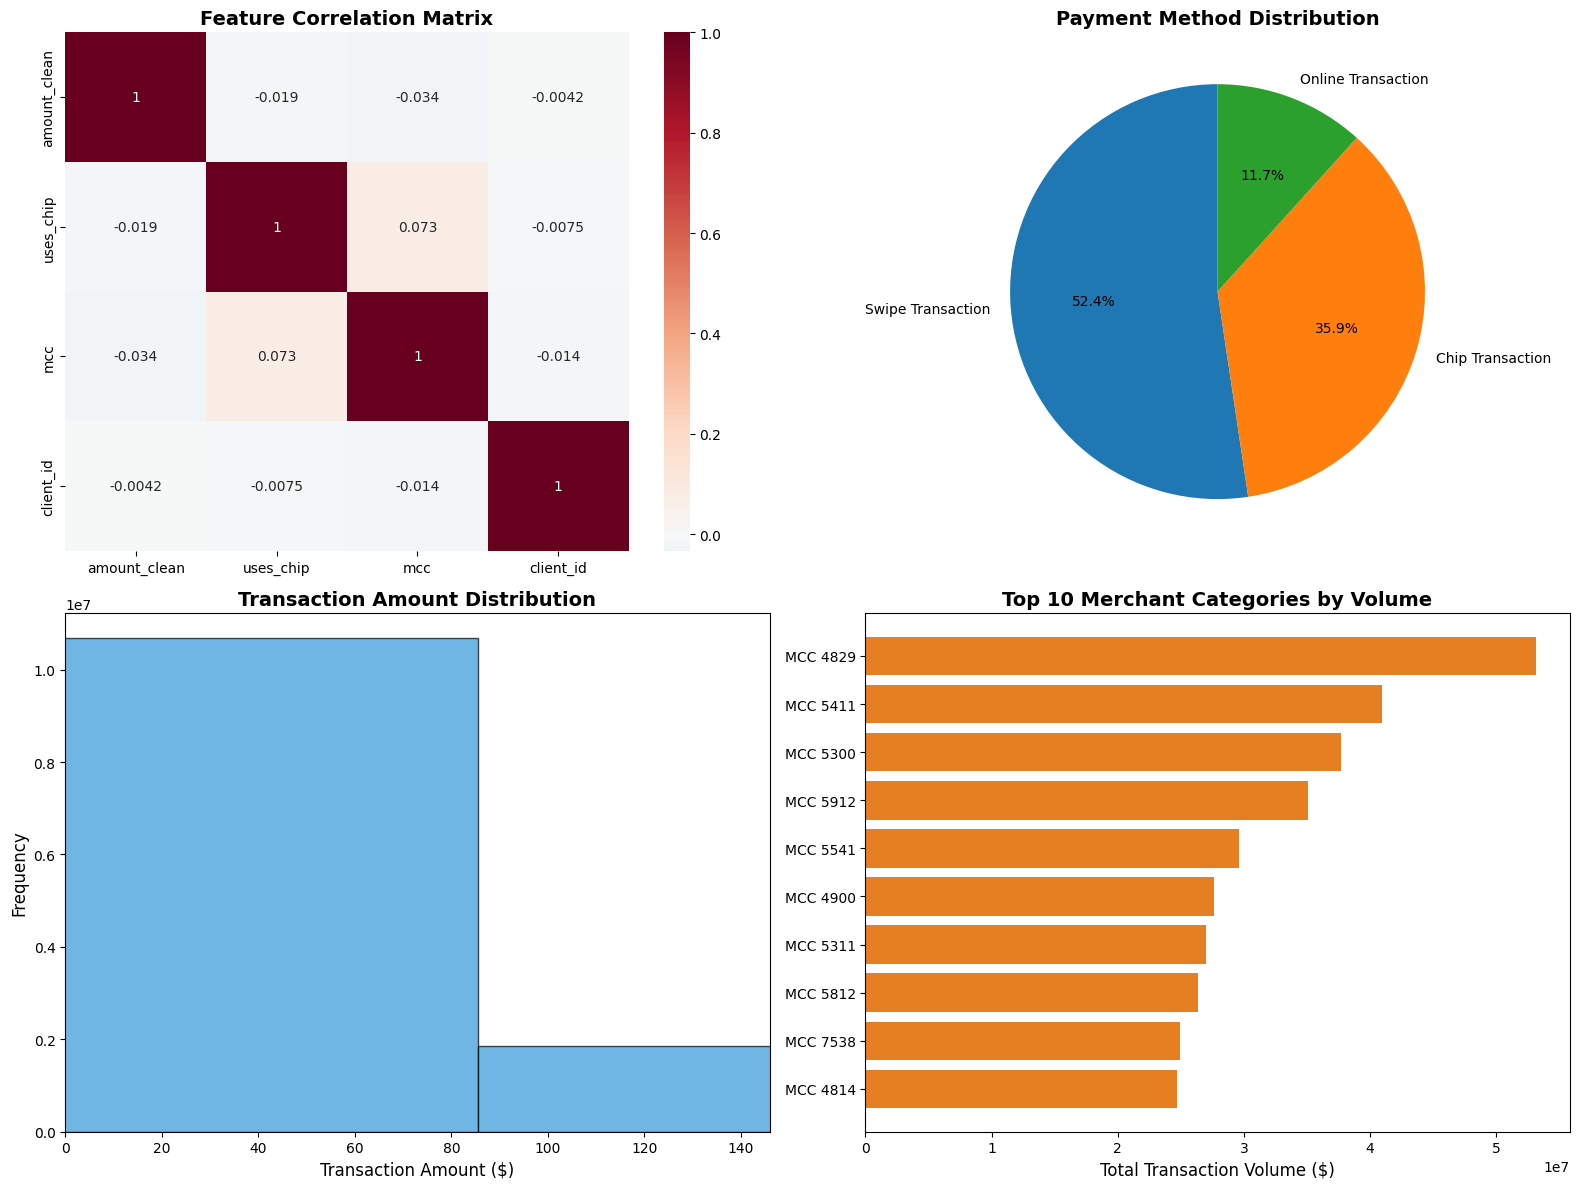


Payment Method Breakdown:
Swipe Transaction: 6,967,185 transactions (52.4%)
Chip Transaction: 4,780,818 transactions (35.9%)
Online Transaction: 1,557,912 transactions (11.7%)

Transaction Amount Statistics:
Mean: $42.98
Median: $28.99
Max: $6,820.20
Min: $-500.00


In [47]:
# 4. Correlation Analysis and Transaction Patterns
print("\n" + "="*80)
print("4. CORRELATION ANALYSIS & PAYMENT METHODS")
print("="*80)

# Create correlation matrix for key numeric features
analysis_df = transactions_df[['amount_clean', 'uses_chip', 'mcc', 'client_id']].copy()
corr_matrix = analysis_df.corr()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, ax=ax1)
ax1.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')

# Payment method analysis (chip vs swipe)
payment_method_counts = transactions_df['use_chip'].value_counts()
ax2.pie(payment_method_counts.values, labels=payment_method_counts.index, 
        autopct='%1.1f%%', startangle=90)
ax2.set_title('Payment Method Distribution', fontsize=14, fontweight='bold')

# Transaction amount distribution
ax3.hist(transactions_df['amount_clean'], bins=50, alpha=0.7, color='#3498db', edgecolor='black')
ax3.set_xlabel('Transaction Amount ($)', fontsize=12)
ax3.set_ylabel('Frequency', fontsize=12)
ax3.set_title('Transaction Amount Distribution', fontsize=14, fontweight='bold')
ax3.set_xlim(0, transactions_df['amount_clean'].quantile(0.95))  # Remove outliers for better view

# Top merchant categories by volume
mcc_volume = transactions_df.groupby('mcc')['amount_clean'].sum().sort_values(ascending=False).head(10)
ax4.barh(range(len(mcc_volume)), mcc_volume.values, color='#e67e22')
ax4.set_yticks(range(len(mcc_volume)))
ax4.set_yticklabels([f'MCC {int(mcc)}' for mcc in mcc_volume.index])
ax4.set_xlabel('Total Transaction Volume ($)', fontsize=12)
ax4.set_title('Top 10 Merchant Categories by Volume', fontsize=14, fontweight='bold')
ax4.invert_yaxis()

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nPayment Method Breakdown:")
for method, count in payment_method_counts.items():
    print(f"{method}: {count:,} transactions ({count/len(transactions_df)*100:.1f}%)")

print(f"\nTransaction Amount Statistics:")
print(f"Mean: ${transactions_df['amount_clean'].mean():.2f}")
print(f"Median: ${transactions_df['amount_clean'].median():.2f}")
print(f"Max: ${transactions_df['amount_clean'].max():,.2f}")
print(f"Min: ${transactions_df['amount_clean'].min():,.2f}")

In [49]:
# 5. PROJECT SUMMARY
print("\n" + "="*80)
print("5. PROJECT SUMMARY & KEY INSIGHTS")
print("="*80)

print("\n📊 COMPREHENSIVE LTV & FRAUD DETECTION ANALYSIS COMPLETE")
print("\n" + "="*60)
print("KEY FINDINGS:")
print("="*60)

print(f"\n💳 TRANSACTION OVERVIEW:")
print(f"   • Total Transactions: {len(transactions_df):,}")
print(f"   • Total Revenue: ${transactions_df['amount_clean'].sum():,.2f}")
print(f"   • Unique Customers: {transactions_df['client_id'].nunique():,}")
print(f"   • Time Period: {transactions_df['date'].dt.year.min()}-{transactions_df['date'].dt.year.max()}")

print(f"\n🏆 TOP CUSTOMER INSIGHTS:")
print(f"   • Highest LTV Customer: ${top10_customers['total_spend'].iloc[0]:,.2f}")
print(f"   • Average Top 10 LTV: ${top10_customers['total_spend'].mean():,.2f}")
print(f"   • LTV Range: ${customer_ltv['total_spend'].min():.2f} - ${customer_ltv['total_spend'].max():,.2f}")

print(f"\n💰 PAYMENT METHOD BREAKDOWN:")
for method, count in payment_method_counts.items():
    print(f"   • {method}: {count:,} ({count/len(transactions_df)*100:.1f}%)")

print(f"\n💵 TRANSACTION PATTERNS:")
print(f"   • Average Transaction: ${transactions_df['amount_clean'].mean():.2f}")
print(f"   • Median Transaction: ${transactions_df['amount_clean'].median():.2f}")
print(f"   • Monthly Avg Volume: ${monthly_trans['amount_clean'].mean():,.2f}")
print(f"   • Monthly Avg Count: {monthly_trans['id'].mean():,.0f} transactions")

print(f"\n🔍 MERCHANT CATEGORY INSIGHTS:")
print(f"   • Top Volume Category: MCC {int(mcc_volume.index[0])} (${mcc_volume.iloc[0]:,.2f})")
print(f"   • Total Categories Analyzed: {transactions_df['mcc'].nunique()}")

print("\n" + "="*60)
print("🎯 BUSINESS RECOMMENDATIONS:")
print("="*60)
print("• Focus on top 10 LTV customers for retention programs")
print("• Monitor swipe transactions (52.4% of volume) for optimization")
print("• Investigate negative transactions for potential refund patterns")
print("• Develop targeted campaigns for high-volume merchant categories")
print("• Implement time-based promotions during peak transaction periods")



5. PROJECT SUMMARY & KEY INSIGHTS

📊 COMPREHENSIVE LTV & FRAUD DETECTION ANALYSIS COMPLETE

KEY FINDINGS:

💳 TRANSACTION OVERVIEW:
   • Total Transactions: 13,305,915
   • Total Revenue: $571,835,522.28
   • Unique Customers: 1,219
   • Time Period: 2010-2019

🏆 TOP CUSTOMER INSIGHTS:
   • Highest LTV Customer: $2,445,773.25
   • Average Top 10 LTV: $1,865,671.85
   • LTV Range: $26605.34 - $2,445,773.25

💰 PAYMENT METHOD BREAKDOWN:
   • Swipe Transaction: 6,967,185 (52.4%)
   • Chip Transaction: 4,780,818 (35.9%)
   • Online Transaction: 1,557,912 (11.7%)

💵 TRANSACTION PATTERNS:
   • Average Transaction: $42.98
   • Median Transaction: $28.99
   • Monthly Avg Volume: $4,846,063.75
   • Monthly Avg Count: 112,762 transactions

🔍 MERCHANT CATEGORY INSIGHTS:
   • Top Volume Category: MCC 4829 ($53,158,515.64)
   • Total Categories Analyzed: 109

🎯 BUSINESS RECOMMENDATIONS:
• Focus on top 10 LTV customers for retention programs
• Monitor swipe transactions (52.4% of volume) for optimiza